### <font color = Grey>-----------------------------------------------------</font><font color = Navy Blue> Assignment - Advance Regression </font> <font color = Grey>-------------------------------------------------------</font>

### `Business Objective:`

- A US-based housing company named <font color = Blue>**Surprise Housing**</font> has decided to enter the <font color = Blue>**Australian**</font> market.

- The company is looking at <font color = Blue>**prospective properties**</font> to buy to enter the market.

- The company wants to know:
    - Which variables are <font color = Blue>**significant**</font> in predicting the price of a house
    - How well those variables <font color = Blue>**describe the price**</font> of a house
 
- Based on the important driving factors the company wants to <font color = Blue>**manipulate the strategy of the firm**</font> and <font color = Blue>**concentrate on areas**</font> that will <font color = Blue>**yield high returns**</font>.

### `Analytical Objective:`
- Build a <font color = Blue>**regression model using regularisation**</font> in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the <font color = Blue>**optimal value of lambda**</font> for <font color = Blue>**ridge**</font> and <font color = Blue>**lasso**</font> regression.
- Identify which variables are <font color = Blue>**significant**</font> in predicting the price of a house.
- Understand how well those variables <font color = Blue>**describe the price**</font> of a house. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### `Modeling Approach:`
1. Reading the data for modeling
2. Understanding the data
3. Apply business filters on the data
4. Data cleaning
5. Derive new variables
6. Anamoly detection and treatment
7. Exploratory data analysis
8. Data preparation for modeling
9. Create train and test datastes for modeling
10. Modeling & evaluation
	- Ridge regression
	- Lasso regression
11. Summarising driving factors for pricing dynamics  

#### <font color = Blue> **Step1: Reading the data for modeling**</font>

#### Set desired working directory

In [1]:
#Take user input on desired working directory
import os
entered_path = input('Enter the working direcctory path where input files are available: \n')

#Update the entered path to python format if required
if('\\\\' in entered_path):
    updated_path = entered_path
    updated_path = updated_path.lstrip()
    updated_path = updated_path.rstrip()
else:
    updated_path = entered_path.replace('\\','\\\\')
    updated_path = updated_path.lstrip()
    updated_path = updated_path.rstrip()
print('\n')

#Set the working directory
os.chdir(updated_path)
#os.getcwd()

#Display set working directory
print('Set working directory is: \n',updated_path)

Enter the working direcctory path where input files are available: 
C:\Users\SUSHANT\Files\Kaggle\Competitions\House Prices - Advance Regression


Set working directory is: 
 C:\\Users\\SUSHANT\\Files\\Kaggle\\Competitions\\House Prices - Advance Regression


#### Supress warning and load necessary libraries

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load required modules and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#### Load data for modeling

In [4]:
#Load the data
pricing_data_df = pd.read_csv('train.csv',sep=",",engine='python')

#### Standardise (lowercase) variable names

In [5]:
#Convert all columns names to lower case
pricing_data_df.columns = pricing_data_df.columns.str.lower()
pricing_data_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

#### <font color = Blue> **Step 2: Understanding the data**</font>

#### Check the structure of the loaded data

In [6]:
#Check number of rows and columns in the loaded data
print('There are',pricing_data_df.shape[0],'records and',pricing_data_df.shape[1],'variables in the data available for modeling.')

There are 1460 records and 81 variables in the data available for modeling.


**Observation**: The number of datapoints is higher than number of variables. So we are good to proceed and prep the data for modeling.

In [7]:
#Looking at top entries to confirm if data is loaded properly
pricing_data_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Observation**: There are some **missing values** in few of the variables.

#### Understand how many qualitative & quantitative variables are available (raw data) 

In [8]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  81
Total quantitative variables are:  38
Total qualitative variables are:  43


#### Correction of the data types of loaded variables (if any)

In [9]:
#Print out all variables loaded as qualitative
print(qualitative_variables)

['lotshape', 'centralair', 'landslope', 'salecondition', 'garagequal', 'poolqc', 'foundation', 'heatingqc', 'bsmtfintype2', 'functional', 'garagecond', 'bsmtfintype1', 'street', 'roofstyle', 'bldgtype', 'electrical', 'masvnrtype', 'bsmtcond', 'alley', 'paveddrive', 'utilities', 'lotconfig', 'condition2', 'landcontour', 'fence', 'fireplacequ', 'garagetype', 'exterqual', 'mszoning', 'kitchenqual', 'condition1', 'exterior1st', 'heating', 'neighborhood', 'exterior2nd', 'extercond', 'bsmtexposure', 'roofmatl', 'miscfeature', 'bsmtqual', 'housestyle', 'saletype', 'garagefinish']


In [10]:
#Print out all variables loaded as quantitative
print(quantitative_variables)

['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice']


14 of the aforementioned variables need to updated from quantitative to qualitative data type.

In [11]:
#Create a list of variable which need data type update
type_update_variables = ['mssubclass','overallqual','overallcond','bsmtfullbath','bsmthalfbath',
                         'bedroomabvgr','kitchenabvgr','totrmsabvgrd','fireplaces','garagecars',
                         'fullbath','halfbath','mosold', 'yrsold']

In [12]:
#View the data type before update
pricing_data_df[type_update_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mssubclass    1460 non-null   int64
 1   overallqual   1460 non-null   int64
 2   overallcond   1460 non-null   int64
 3   bsmtfullbath  1460 non-null   int64
 4   bsmthalfbath  1460 non-null   int64
 5   bedroomabvgr  1460 non-null   int64
 6   kitchenabvgr  1460 non-null   int64
 7   totrmsabvgrd  1460 non-null   int64
 8   fireplaces    1460 non-null   int64
 9   garagecars    1460 non-null   int64
 10  fullbath      1460 non-null   int64
 11  halfbath      1460 non-null   int64
 12  mosold        1460 non-null   int64
 13  yrsold        1460 non-null   int64
dtypes: int64(14)
memory usage: 159.8 KB


In [13]:
#Update the data type of all the 10 variables
for i in type_update_variables:
    pricing_data_df[i] = pricing_data_df[i].astype(str)

In [14]:
#View the data type after update
pricing_data_df[type_update_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mssubclass    1460 non-null   object
 1   overallqual   1460 non-null   object
 2   overallcond   1460 non-null   object
 3   bsmtfullbath  1460 non-null   object
 4   bsmthalfbath  1460 non-null   object
 5   bedroomabvgr  1460 non-null   object
 6   kitchenabvgr  1460 non-null   object
 7   totrmsabvgrd  1460 non-null   object
 8   fireplaces    1460 non-null   object
 9   garagecars    1460 non-null   object
 10  fullbath      1460 non-null   object
 11  halfbath      1460 non-null   object
 12  mosold        1460 non-null   object
 13  yrsold        1460 non-null   object
dtypes: object(14)
memory usage: 159.8+ KB


We will consider available volume of data points as sufficient for modeling and won't look into any methods to increase the number of datapoints.

#### <font color = Blue> **Step 3: Apply business filters on the data**</font>

#### Remove the records that are out of scope for modeling - consider normal sales only

**Assumption** -  We will assume that the company is interested in learning the pricing dynamics based on the normal sales that happened in the past. Thus we will filter only **normal** sales for modeling. 

In [15]:
#Check different types of sales that happened in past
pricing_data_df.salecondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: salecondition, dtype: int64

In [16]:
#Filter normal sales for modeling
pricing_data_df = pricing_data_df[pricing_data_df['salecondition']=='Normal']

In [17]:
#Check if different types of sales apart from normal are dropped
pricing_data_df.salecondition.value_counts()

Normal    1198
Name: salecondition, dtype: int64

#### Remove variable that are out of scope for modeling - drop unwanted variables for modeling

**Assumption** -  We will assume that the company is interested in learning the pricing dynamics based on key actionable variables and will drop following variables assuming they are of no relevance to the modeling objective.

- ID
- MoSold
- YrSold
- GarageYrBlt
- WoodDeckSF
- MiscFeature
- MiscVal
- 3SsnPorch
- ScreenPorch
- OpenPorchSF
- EnclosedPorch
- Utilities
- SaleCondition

Apart from the above variable we will also drop following variables as they are explained by other independent variables in the data.

- BsmtFinSF1  + BsmtFinSF2 + BsmtUnfSF => Explained by **TotalBsmtSF**
- 1stFlrSF + 2ndFlrSF + LowQualFinSF = > Explained by **GrLivArea**

In [18]:
#Create a list of variables to be dropped
drop_variables = ['id','mosold','yrsold','garageyrblt','wooddecksf','miscfeature','miscval',
                  '3ssnporch','screenporch','openporchsf','enclosedporch','bsmtfinsf1','bsmtfinsf2',
                  'bsmtunfsf','1stflrsf','2ndflrsf','lowqualfinsf','utilities','salecondition']

In [19]:
#Drop the shortlisted variables
pricing_data_df.drop(drop_variables, axis = 1, inplace = True)

In [20]:
#Check number of rows and columns in the loaded data
print('There are',pricing_data_df.shape[0],'records and',pricing_data_df.shape[1],'variables in the data available for modeling.')

There are 1198 records and 62 variables in the data available for modeling.


#### Re-Check how many qualitative & quantitative variables are available (updated data) 

In [21]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  62
Total quantitative variables are:  10
Total qualitative variables are:  52


Any addtional data type updates arising as part of the data preparation step will be handled then.

#### <font color = Blue> **Step 4: Data Cleaning**</font>

#### Check the proportion of missing values in each variable

In [22]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(pricing_data_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(pricing_data_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 17 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
58,poolqc,1195,99.75
5,alley,1127,94.07
59,fence,957,79.88
49,fireplacequ,563,46.99
2,lotfrontage,237,19.78
50,garagetype,61,5.09
54,garagequal,61,5.09
51,garagefinish,61,5.09
55,garagecond,61,5.09
32,bsmtfintype2,33,2.75


**Observations:**
1. There **are no missing values** in the **dependent variable** of the modeling data.
2. Some the missing values are **expected for the given variable**, where as for others we will **need to impute** them.

#### Drop missing data points less in volume (proportion <=1%)

In [23]:
#Filter the variables for whom we can drop the records
missing_values_df[(missing_values_df['missing_value_prop']<=1) & (missing_values_df['missing_value_prop']>0)]

,variable,missing_value_count,missing_value_prop
23,masvnrtype,4,0.33
24,masvnrarea,4,0.33
37,electrical,1,0.08


For these 3 variables we will drop the corresponding records and check how many records are left for modeling.

In [24]:
#Drop the missing value data points from pricing_data_df that less in volume i.e. <=1% missing records
print('Total records before dropping missing data points were',len(pricing_data_df))
pricing_data_df = pricing_data_df.dropna(how='any', subset=['masvnrtype', 'masvnrarea','electrical'])
print('Total records after dropping missing data points are',len(pricing_data_df))

Total records before dropping missing data points were 1198
Total records after dropping missing data points are 1193


#### Drop variables with high volume of missing information (proportion >=70%)

In [25]:
#Create a empty list to store name of variables that need to be dropped
drop_columns = []

In [26]:
#Filter the variables which can be dropped for having high volume of missing information
missing_values_df[missing_values_df['missing_value_prop']>=70]

,variable,missing_value_count,missing_value_prop
58,poolqc,1195,99.75
5,alley,1127,94.07
59,fence,957,79.88


These 3 independent variables with high proportion of missing values might have genuine blanks or some other imputation might be needed. Thus, we'll check each of them before dropping any of these variaables. 

In [27]:
#Check distinct values for poolqc - 1st variable to check
pricing_data_df.poolqc.value_counts()

Fa    2
Gd    1
Name: poolqc, dtype: int64

Pool Quality i.e. poolqc information is available only for 3 records. We'll check if it is in sync with Pool Area i.e. poolarea information.

In [28]:
#Check distinct values for poolarea 
pricing_data_df.poolarea.value_counts()

0      1190
648       1
576       1
519       1
Name: poolarea, dtype: int64

Pool Area information is also available for only 3 records. Thus we will drop both poolqc and poolarea variables from modeling scope.

In [29]:
#Update the drop_columns list with pool relaed variables
drop_pool_variables = ['poolqc','poolarea']
drop_columns.extend(drop_pool_variables)

#Check variables to drop so far
print('List of variables to drop',drop_columns)

List of variables to drop ['poolqc', 'poolarea']


In [30]:
#Check distinct values for alley - 2nd variable to check
pricing_data_df.alley.value_counts()

Grvl    43
Pave    28
Name: alley, dtype: int64

In [31]:
#Check how many records have blanks for alley variable
len(pricing_data_df[pricing_data_df['alley'].isna()])

1122

The missing values in alley correspond to the property not having alley access. Thus we will impute the missing values as **'Noally'** in the data.

In [32]:
#Fill missing values in alley with 'Noally' value
pricing_data_df['alley'].fillna('Noally', inplace = True)

#Check the updated pricing_data_df for alley
pricing_data_df.alley.value_counts()

Noally    1122
Grvl        43
Pave        28
Name: alley, dtype: int64

In [33]:
#Check distinct values for fence - 3rd variable to check
pricing_data_df.fence.value_counts()

MnPrv    135
GdPrv     52
GdWo      45
MnWw       9
Name: fence, dtype: int64

In [34]:
#Check how many records have blanks for fence variable
len(pricing_data_df[pricing_data_df['fence'].isna()])

952

The missing values in fence correspond to the property not having any fencing. Thus we will impute the missing values as **'NoFen'** in the data.

In [35]:
#Fill missing values in fence with 'NoFen' value
pricing_data_df['fence'].fillna('NoFen', inplace = True)

#Check the updated pricing_data_df for fence
pricing_data_df.fence.value_counts()

NoFen    952
MnPrv    135
GdPrv     52
GdWo      45
MnWw       9
Name: fence, dtype: int64

Thus, so far we have checked all 3 independent variable that had very high proportion of missing values and decided to drop one of them **poolqc** along with another related variable **poolarea** and imputed remaining 2 **alley** and **fence**. 

#### Check variables with missing information  (1%< proportion <70%)

In [36]:
#Filter the variables which can be dropped for having high volume of missing information
missing_info_variables_df = missing_values_df[(missing_values_df['missing_value_prop']>1) & (missing_values_df['missing_value_prop']<70)]

#View the missing information variables dataframe
missing_info_variables_df

,variable,missing_value_count,missing_value_prop
49,fireplacequ,563,46.99
2,lotfrontage,237,19.78
50,garagetype,61,5.09
54,garagequal,61,5.09
51,garagefinish,61,5.09
55,garagecond,61,5.09
32,bsmtfintype2,33,2.75
30,bsmtexposure,33,2.75
28,bsmtqual,32,2.67
31,bsmtfintype1,32,2.67


We will check which of these 11 variables having low to moderate volume of missing information have only 2 levels in there values.

In [37]:
#Count the number of unique values in each variable of pricing_data_df
unique_values_df = pd.DataFrame(pricing_data_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head()

,variable,unique_value_count
40,bsmthalfbath,2
36,centralair,2
58,poolqc,2
4,street,2
5,alley,3


In [38]:
#Filter the 11 variables of interest from unique_values_df
unique_values_df[unique_values_df['variable'].isin(missing_info_variables_df['variable'])]

,variable,unique_value_count
51,garagefinish,3
29,bsmtcond,4
30,bsmtexposure,4
28,bsmtqual,4
49,fireplacequ,5
55,garagecond,5
54,garagequal,5
31,bsmtfintype1,6
32,bsmtfintype2,6
50,garagetype,6


None of the 11 variables with missing information have only 2 levels. Thus, we'll inspect each of the 11 variables individually and try to impute them.

In [39]:
#Check distinct values for garagefinish - 1st variable to check
pricing_data_df.garagefinish.value_counts()

Unf    529
RFn    339
Fin    264
Name: garagefinish, dtype: int64

In [40]:
#Check how many records have blanks for garagefinish variable
len(pricing_data_df[pricing_data_df['garagefinish'].isna()])

61

The missing values in garagefinish correspond to the property not having any garage. Thus we will impute the missing values as **'NoG'** in the data.

In [41]:
#Fill missing values in garagefinish with 'NoG' value
pricing_data_df['garagefinish'].fillna('NoG', inplace = True)

#Check the updated pricing_data_df for garagefinish
pricing_data_df.garagefinish.value_counts()

Unf    529
RFn    339
Fin    264
NoG     61
Name: garagefinish, dtype: int64

In [42]:
#Check distinct values for bsmtcond - 2nd variable to check
pricing_data_df.bsmtcond.value_counts()

TA    1075
Gd      45
Fa      40
Po       1
Name: bsmtcond, dtype: int64

In [43]:
#Check how many records have blanks for bsmtcond variable
len(pricing_data_df[pricing_data_df['bsmtcond'].isna()])

32

The missing values in bsmtcond correspond to the property not having any basement. Thus we will impute the missing values as **'NB'** in the data.

In [44]:
#Fill missing values in bsmtcond with 'NB' value
pricing_data_df['bsmtcond'].fillna('NB', inplace = True)

#Check the updated pricing_data_df for bsmtcond
pricing_data_df.bsmtcond.value_counts()

TA    1075
Gd      45
Fa      40
NB      32
Po       1
Name: bsmtcond, dtype: int64

In [45]:
#Check distinct values for bsmtexposure - 3rd variable to check
pricing_data_df.bsmtexposure.value_counts()

No    800
Av    162
Gd    106
Mn     92
Name: bsmtexposure, dtype: int64

In [46]:
#Check how many records have blanks for bsmtexposure variable
len(pricing_data_df[pricing_data_df['bsmtexposure'].isna()])

33

The missing values in bsmtexposure correspond to the property not having any basement. Thus we will impute the missing values as **'NB'** in the data.

In [47]:
#Fill missing values in bsmtexposure with 'NB' value
pricing_data_df['bsmtexposure'].fillna('NB', inplace = True)

#Check the updated pricing_data_df for bsmtexposure
pricing_data_df.bsmtexposure.value_counts()

No    800
Av    162
Gd    106
Mn     92
NB     33
Name: bsmtexposure, dtype: int64

In [48]:
#Check distinct values for bsmtqual - 4th variable to check
pricing_data_df.bsmtqual.value_counts()

TA    564
Gd    503
Ex     65
Fa     29
Name: bsmtqual, dtype: int64

In [49]:
#Check how many records have blanks for bsmtqual variable
len(pricing_data_df[pricing_data_df['bsmtqual'].isna()])

32

The missing values in bsmtqual correspond to the property not having any basement. Thus we will impute the missing values as **'NB'** in the data.

In [50]:
#Fill missing values in bsmtqual with 'NB' value
pricing_data_df['bsmtqual'].fillna('NB', inplace = True)

#Check the updated pricing_data_df for bsmtqual
pricing_data_df.bsmtqual.value_counts()

TA    564
Gd    503
Ex     65
NB     32
Fa     29
Name: bsmtqual, dtype: int64

In [51]:
#Check distinct values for fireplacequ - 5th variable to check
pricing_data_df.fireplacequ.value_counts()

TA    285
Gd    284
Fa     30
Po     19
Ex     15
Name: fireplacequ, dtype: int64

In [52]:
#Check how many records have blanks for fireplacequ variable
len(pricing_data_df[pricing_data_df['fireplacequ'].isna()])

560

The missing values in fireplacequ correspond to the property not having any fireplace. Thus we will impute the missing values as **'NF'** in the data.

In [53]:
#Fill missing values in fireplacequ with 'NF' value
pricing_data_df['fireplacequ'].fillna('NF', inplace = True)

#Check the updated pricing_data_df for fireplacequ
pricing_data_df.fireplacequ.value_counts()

NF    560
TA    285
Gd    284
Fa     30
Po     19
Ex     15
Name: fireplacequ, dtype: int64

In [54]:
#Check distinct values for garagecond - 6th variable to check
pricing_data_df.garagecond.value_counts()

TA    1086
Fa      32
Gd       7
Po       5
Ex       2
Name: garagecond, dtype: int64

In [55]:
#Check how many records have blanks for garagecond variable
len(pricing_data_df[pricing_data_df['garagecond'].isna()])

61

The missing values in garagecond correspond to the property not having any garage. Thus we will impute the missing values as **'NG'** in the data.

In [56]:
#Fill missing values in garagecond with 'NG' value
pricing_data_df['garagecond'].fillna('NG', inplace = True)

#Check the updated pricing_data_df for garagecond
pricing_data_df.garagecond.value_counts()

TA    1086
NG      61
Fa      32
Gd       7
Po       5
Ex       2
Name: garagecond, dtype: int64

In [57]:
#Check distinct values for garagequal - 7th variable to check
pricing_data_df.garagequal.value_counts()

TA    1075
Fa      40
Gd      12
Ex       3
Po       2
Name: garagequal, dtype: int64

In [58]:
#Check how many records have blanks for garagequal variable
len(pricing_data_df[pricing_data_df['garagequal'].isna()])

61

The missing values in garagequal correspond to the property not having any garage. Thus we will impute the missing values as **'NG'** in the data.

In [59]:
#Fill missing values in garagequal with 'NG' value
pricing_data_df['garagequal'].fillna('NG', inplace = True)

#Check the updated pricing_data_df for garagequal
pricing_data_df.garagequal.value_counts()

TA    1075
NG      61
Fa      40
Gd      12
Ex       3
Po       2
Name: garagequal, dtype: int64

In [60]:
#Check distinct values for bsmtfintype1 - 8th variable to check
pricing_data_df.bsmtfintype1.value_counts()

GLQ    327
Unf    321
ALQ    195
BLQ    136
Rec    116
LwQ     66
Name: bsmtfintype1, dtype: int64

In [61]:
#Check how many records have blanks for bsmtfintype1 variable
len(pricing_data_df[pricing_data_df['bsmtfintype1'].isna()])

32

The missing values in bsmtfintype1 correspond to the property not having any basement. Thus we will impute the missing values as **'NBA'** in the data.

In [62]:
#Fill missing values in bsmtfintype1 with 'NBA' value
pricing_data_df['bsmtfintype1'].fillna('NBA', inplace = True)

#Check the updated pricing_data_df for bsmtfintype1
pricing_data_df.bsmtfintype1.value_counts()

GLQ    327
Unf    321
ALQ    195
BLQ    136
Rec    116
LwQ     66
NBA     32
Name: bsmtfintype1, dtype: int64

In [63]:
#Check distinct values for bsmtfintype2 - 9th variable to check
pricing_data_df.bsmtfintype2.value_counts()

Unf    1013
Rec      48
LwQ      39
BLQ      30
ALQ      17
GLQ      13
Name: bsmtfintype2, dtype: int64

In [64]:
#Check how many records have blanks for bsmtfintype2 variable
len(pricing_data_df[pricing_data_df['bsmtfintype2'].isna()])

33

The missing values in bsmtfintype2 correspond to the property not having any basement. Thus we will impute the missing values as **'NBA'** in the data.

In [65]:
#Fill missing values in bsmtfintype2 with 'NBA' value
pricing_data_df['bsmtfintype2'].fillna('NBA', inplace = True)

#Check the updated pricing_data_df for bsmtfintype2
pricing_data_df.bsmtfintype2.value_counts()

Unf    1013
Rec      48
LwQ      39
NBA      33
BLQ      30
ALQ      17
GLQ      13
Name: bsmtfintype2, dtype: int64

In [66]:
#Check distinct values for garagetype - 10th variable to check
pricing_data_df.garagetype.value_counts()

Attchd     709
Detchd     338
BuiltIn     63
Basment     12
CarPort      6
2Types       4
Name: garagetype, dtype: int64

In [67]:
#Check how many records have blanks for garagetype variable
len(pricing_data_df[pricing_data_df['garagetype'].isna()])

61

The missing values in garagetype correspond to the property not having any garage. Thus we will impute the missing values as **'NoGar'** in the data.

In [68]:
#Fill missing values in garagetype with 'NoGar' value
pricing_data_df['garagetype'].fillna('NoGar', inplace = True)

#Check the updated pricing_data_df for garagetype
pricing_data_df.garagetype.value_counts()

Attchd     709
Detchd     338
BuiltIn     63
NoGar       61
Basment     12
CarPort      6
2Types       4
Name: garagetype, dtype: int64

In [69]:
#Check distinct values for lotfrontage - 11th variable to check
pricing_data_df.lotfrontage.value_counts()

60.0     120
70.0      62
80.0      60
50.0      49
75.0      46
        ... 
46.0       1
313.0      1
141.0      1
149.0      1
137.0      1
Name: lotfrontage, Length: 105, dtype: int64

In [70]:
#Check how many records have blanks for lotfrontage variable
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

236

The missing values in lotfrontage are genuine and needs imputation. Lets look at all the Lot variables i.e. lotarea, lotconfig
lotfrontage and lotshape.

In [71]:
#Create a subset of lot variables from pricing_data_df as lot_df
lot_df = pricing_data_df[['lotarea','lotconfig','lotfrontage','lotshape']]

#Create a groupby object basis lotshape
lot_groups = lot_df.groupby(['lotshape'])

In [72]:
#Check the mean value of each group
lot_groups.mean()

,lotarea,lotfrontage
lotshape,,
IR1,11940.703518,76.056452
IR2,25156.285714,80.136364
IR3,44523.714286,76.500000
Reg,8819.766268,66.204978


In [73]:
#Check the median value of each group
lot_groups.median()

,lotarea,lotfrontage
lotshape,,
IR1,10572.5,73.5
IR2,13568.0,58.5
IR3,16226.0,63.0
Reg,8777.0,66.0


In [74]:
#Check the volume of records per group
lot_groups.count()

,lotarea,lotconfig,lotfrontage
lotshape,,,
IR1,398,398,248
IR2,35,35,22
IR3,7,7,4
Reg,753,753,683


For the major lot shapes i.e. **IR1** and **Reg** the mean and median corresponding to **lotfrontage** aren't similar. Thus, we will do group wise **median imputation for lotfrontage**. 

In [75]:
#Check how many records have blanks for lotfrontage variable that needs imputation
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

236

In [76]:
#Create a boolean mask for lotshape IR1
mask = ((pricing_data_df['lotshape'] == 'IR1') & (pricing_data_df['lotfrontage'].isna()))

#Check the values to be imputed in the series of booleans for given group
mask.value_counts()

False    1043
True      150
dtype: int64

In [78]:
#Update the missing values in lotfrontage corresponding to lotshape IR1
pricing_data_df['lotfrontage'][mask] = 73.5

In [79]:
#Check how many records have blanks left for lotfrontage variable
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

86

In [80]:
#Create a boolean mask for lotshape IR2
mask = ((pricing_data_df['lotshape'] == 'IR2') & (pricing_data_df['lotfrontage'].isna()))

#Check the values to be imputed in the series of booleans for given group
mask.value_counts()

False    1180
True       13
dtype: int64

In [81]:
#Update the missing values in lotfrontage corresponding to lotshape IR2
pricing_data_df['lotfrontage'][mask] = 58.5

In [82]:
#Check how many records have blanks left for lotfrontage variable
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

73

In [83]:
#Create a boolean mask for lotshape IR3
mask = ((pricing_data_df['lotshape'] == 'IR3') & (pricing_data_df['lotfrontage'].isna()))

#Check the values to be imputed in the series of booleans for given group
mask.value_counts()

False    1190
True        3
dtype: int64

In [84]:
#Update the missing values in lotfrontage corresponding to lotshape IR2
pricing_data_df['lotfrontage'][mask] = 63.0

In [85]:
#Check how many records have blanks left for lotfrontage variable
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

70

In [86]:
#Create a boolean mask for lotshape Reg
mask = ((pricing_data_df['lotshape'] == 'Reg') & (pricing_data_df['lotfrontage'].isna()))

#Check the values to be imputed in the series of booleans for given group
mask.value_counts()

False    1123
True       70
dtype: int64

In [87]:
#Update the missing values in lotfrontage corresponding to lotshape Reg
pricing_data_df['lotfrontage'][mask] = 66.0

In [88]:
#Check how many records have blanks left for lotfrontage variable
len(pricing_data_df[pricing_data_df['lotfrontage'].isna()])

0

Thus, we have imputed an important variable like **lotfrontage** in conjunction with **lotshape**.

#### Check the variables left with missing information (post imputation)

In [89]:
#Create a missing values count dataframe as missing_values_df
missing_values_df = pd.DataFrame(pricing_data_df.isnull().sum())

#Pull the variable names from index as a seperate column
missing_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
missing_values_df = missing_values_df.rename(columns = {0: "missing_value_count",
                                                        "index": "variable"})

#Sort the missing_values_df
missing_values_df.sort_values(["missing_value_count", "variable"], axis=0, ascending=False, inplace=True)

#Add proportion of missing values column
missing_values_df['missing_value_prop'] = round((missing_values_df['missing_value_count']/len(pricing_data_df))*100,2)

#View the variables from missing_values_df having missing values
print('\nThere are following', len(missing_values_df[missing_values_df['missing_value_count'] >0]), 'variables in modeling data that have missing values.')
missing_values_df[missing_values_df['missing_value_count'] >0]


There are following 1 variables in modeling data that have missing values.


,variable,missing_value_count,missing_value_prop
58,poolqc,1190,99.75


We have already considered **'poolqc'** along with **'poolarea'** to be dropped and are available in drop_columns list. Before dropping them we will create a derived variable to capture the presence or absence of a pool in a given property.

In [90]:
#Create a new derived variable to capture pool presence in a property
pricing_data_df['haspool'] = pricing_data_df['poolarea'].apply(lambda x: 1 if x > 0 else 0)

#Update the data type as qualitative
pricing_data_df['haspool'] = pricing_data_df['haspool'].astype(str)

#### Drop zero/low variance variables

In [91]:
#Check the low variance columns already identified during imputation phase
drop_columns

['poolqc', 'poolarea']

Identify new variables with high skewness/low variance that should be dropped from modeling scope.

In [92]:
#Count the number of unique values in each variable of pricing_data_df
unique_values_df = pd.DataFrame(pricing_data_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

#View the unique_values_df
unique_values_df.head(10)

,variable,unique_value_count
40,bsmthalfbath,2
36,centralair,2
62,haspool,2
58,poolqc,2
4,street,2
5,alley,3
39,bsmtfullbath,3
42,halfbath,3
44,kitchenabvgr,3
9,landslope,3


Analyse variance in variables with just 2 levels in them.

In [93]:
#Filter the variables with just two levels in them
two_level_variables = unique_values_df[unique_values_df['unique_value_count']==2]
two_level_variables

,variable,unique_value_count
40,bsmthalfbath,2
36,centralair,2
62,haspool,2
58,poolqc,2
4,street,2


Variable **poolqc** is already added to drop_columns list and **haspool** is the new derived variable. We'll analyse remaining 3 variables.

In [94]:
#Create a temporary dataframe for checking variance in bsmthalfbath
temporary_df = pd.DataFrame(pricing_data_df.bsmthalfbath.value_counts())

#Create a proportion column for values in bsmthalfbath
temporary_df['proportion'] = round(temporary_df['bsmthalfbath']/len(pricing_data_df)*100,0)

#Check variance in variable bsmthalfbath
temporary_df

,bsmthalfbath,proportion
0,1126,94.0
1,67,6.0


As the data in **bsmthalfbath** is highly imbalanced with very low variation we will drop this variable.

In [95]:
#Updated drop_columns list
drop_columns.append('bsmthalfbath')
drop_columns

['poolqc', 'poolarea', 'bsmthalfbath']

In [96]:
#Drop temporary_df
del temporary_df

In [97]:
#Create a temporary dataframe for checking variance in centralair
temporary_df = pd.DataFrame(pricing_data_df.centralair.value_counts())

#Create a proportion column for values in centralair
temporary_df['proportion'] = round(temporary_df['centralair']/len(pricing_data_df)*100,0)

#Check variance in variable centralair
temporary_df

,centralair,proportion
Y,1113,93.0
N,80,7.0


As the data in **centralair** is highly imbalanced with very low variation we will drop this variable.

In [98]:
#Updated drop_columns list
drop_columns.append('centralair')
drop_columns

['poolqc', 'poolarea', 'bsmthalfbath', 'centralair']

In [99]:
#Drop temporary_df
del temporary_df

In [100]:
#Create a temporary dataframe for checking variance in street
temporary_df = pd.DataFrame(pricing_data_df.street.value_counts())

#Create a proportion column for values in street
temporary_df['proportion'] = round(temporary_df['street']/len(pricing_data_df)*100,0)

#Check variance in variable centralair
temporary_df

,street,proportion
Pave,1188,100.0
Grvl,5,0.0


As the data in **street** is highly imbalanced with very low variation we will drop this variable.

In [101]:
#Updated drop_columns list
drop_columns.append('street')
drop_columns

['poolqc', 'poolarea', 'bsmthalfbath', 'centralair', 'street']

In [102]:
#Drop temporary_df
del temporary_df

Check quantitative variables with high skewness.

In [103]:
#Create a dataframe to store skewness information of all variables
skewness_df = pd.DataFrame(pricing_data_df.skew(axis = 0, skipna = True))

#Reset index as a column
skewness_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the missing_prop_df
skewness_df = skewness_df.rename(columns = {0: "skewness",
                                                  "index": "variable"})

#Sort the missing_values_df
skewness_df.sort_values(["skewness", "variable"], axis=0, ascending=False, inplace=True)

#Filter the highly skewed variables
skewness_df = skewness_df[skewness_df['skewness']>=1]

#View datafarme
skewness_df

,variable,skewness
20,poolarea,20.137969
22,haspool,19.891301
2,lotarea,11.976939
15,kitchenabvgr,4.869317
11,bsmthalfbath,3.860432
7,masvnrarea,2.911659
21,saleprice,1.824215
1,lotfrontage,1.817885
0,mssubclass,1.423076


In [104]:
#Check the count of distinct values present for highly skewed variables
unique_values_df[unique_values_df['variable'].isin(skewness_df['variable'])]

,variable,unique_value_count
40,bsmthalfbath,2
62,haspool,2
44,kitchenabvgr,3
57,poolarea,4
0,mssubclass,15
2,lotfrontage,107
24,masvnrarea,276
61,saleprice,529
3,lotarea,892


Variables **bsmthalfbath** and **poolarea** are already part of the drop columns list. **haspool** is an qualitative variable. We'll analyse only **kitchenabvgr**, rest of the variables will be looked into during **anamoly treatment** step.

In [105]:
#Create a temporary dataframe for checking variance in kitchenabvgr
temporary_df = pd.DataFrame(pricing_data_df.kitchenabvgr.value_counts())

#Create a proportion column for values in street
temporary_df['proportion'] = round(temporary_df['kitchenabvgr']/len(pricing_data_df)*100,0)

#Check variance in variable centralair
temporary_df

,kitchenabvgr,proportion
1,1144,96.0
2,48,4.0
3,1,0.0


Although, variable **kitchenabvgr** has 3 levels it is highly imbalanced with very low variation we will drop this variable.

In [106]:
#Updated drop_columns list
drop_columns.append('kitchenabvgr')
drop_columns

['poolqc', 'poolarea', 'bsmthalfbath', 'centralair', 'street', 'kitchenabvgr']

In [107]:
#Drop temporary_df
del temporary_df

Now we have looked into all the unwanted variables and will drop those shortlisted as out of scope for modeling from drop_columns list.

In [108]:
#Drop the low variance/high skewness columns
print('Number of variables before dropping low variance columns',len(pricing_data_df.columns))
pricing_data_df.drop(drop_columns, axis = 1, inplace = True)
print('Number of variables after dropping low variance columns',len(pricing_data_df.columns))

Number of variables before dropping low variance columns 63
Number of variables after dropping low variance columns 57


#### <font color = Blue> **Step 5: Derive new variables**</font>

We will create a new variable **propertyage** for catpuring how old the property is in years. We will use variable **yearbuilt** to derive the values as of today i.e. year 2020.

In [109]:
#Create new variable propertyage
pricing_data_df['propertyage']= 2020  - pricing_data_df['yearbuilt']

#Check if the values are created properly
pricing_data_df[['yearbuilt','propertyage']].head()

,yearbuilt,propertyage
0,2003,17
1,1976,44
2,2001,19
4,2000,20
5,1993,27


In [110]:
#Drop the original variables yearbuilt
pricing_data_df.drop('yearbuilt', axis = 1, inplace = True)

In [111]:
#Check the final set of variables left for modeling
pricing_data_df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'alley', 'lotshape',
       'landcontour', 'lotconfig', 'landslope', 'neighborhood', 'condition1',
       'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond',
       'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'totalbsmtsf', 'heating', 'heatingqc', 'electrical', 'grlivarea',
       'bsmtfullbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'fence', 'saletype', 'saleprice', 'haspool',
       'propertyage'],
      dtype='object')

#### Understand how many qualitative & quantitative variables are available (revised data) 

In [112]:
#Check which columns are quantitative and which columns are qualitative
all_variables = pricing_data_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(pricing_data_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in pricing_data_df are:  57
Total quantitative variables are:  9
Total qualitative variables are:  48


#### <font color = Blue> **Step 6: Anamoly detection and treatment**</font>

#### Anamoly detection - Independent variables

We will create a user defined function to run through all the independent variables and shortlist the variables that might have outliers in them.

In [113]:
#User defined function to check and identify independnet variables which might have outliers in them
def possible_outlier_variables(check_df, check_variable, check_list):
    
    #Compute the inter quartile range
    q1 = check_df[check_variable].quantile(0.25)
    q3 = check_df[check_variable].quantile(0.75)
    iqr = q3 - q1
    
    #Compute the upper and lower cutoff points to identify outliers
    lower_cutoff = q1 - 1.5 * iqr
    if lower_cutoff<0:
        lower_cutoff =0

    upper_cutoff = q3 + 1.5 * iqr

    #Check if outliers exist
    outlier_datapoints = pricing_data_df[check_variable][(pricing_data_df[check_variable] < lower_cutoff ) | (pricing_data_df[check_variable] > upper_cutoff)]
    
    #Check if there are possible outliers
    if(len(outlier_datapoints)>=1):
        check_list.append(check_variable)
    else:
        check_list = check_list
    
    return(check_list)

Use the user defined function to shortlist independent variables with possible outliers.

In [114]:
#Create an empty list to store variables with possible outliers in them 
check_list = []

#Create list of all numerical independnet variables
quantitative_variables

#Loop across all quantitative independent variables to find variables with possible outliers in them
for i in quantitative_variables:
    
    if(i=='saleprice'):                             #Ignore the dependent variable
        i=i
    else:
        check_list = possible_outlier_variables(check_df = pricing_data_df, check_variable = i, check_list = check_list)

#Check how many independnet variables are shortlisted for anamoly treatment
print('There are',len(check_list),'independent variables shortlisted for anamoly treatment.')

There are 7 independent variables shortlisted for anamoly treatment.


#### Anamoly treatment - shortlisted independent variables

In [115]:
#Set the quantiles for checking influential data points
quantile_list = [0, .25, .5, .75, 1.]
quantile_list

[0, 0.25, 0.5, 0.75, 1.0]

We will create a user defined function to run through all shortlisted variables and try to fetch the outlier values for each of then along with a visualisation of there distribution.

In [116]:
#User defined function to compute inter quartile range and find possible outliers
def check_outliers(check_df, check_variable):
    
    #Compute the inter quartile range
    q1 = check_df[check_variable].quantile(0.25)
    q3 = check_df[check_variable].quantile(0.75)
    iqr = q3 - q1
    
    #print('Inter Quartile Range is: ',iqr)

    #Compute the upper and lower cutoff points to identify outliers
    lower_cutoff = q1 - 1.5 * iqr
    if lower_cutoff<0:
        lower_cutoff =0

    upper_cutoff = q3 + 1.5 * iqr

    #print('Lower cutoff for outliers is ',lower_cutoff) 
    #print('Upper cutoff for outliers is ',upper_cutoff)
    
    #Check if outliers exist
    outlier_datapoints = pricing_data_df[check_variable][(pricing_data_df[check_variable] < lower_cutoff )| (pricing_data_df[check_variable] > upper_cutoff)]
    
    #Check if there are possible outliers
    if(len(outlier_datapoints)>=1):
        outlier_datapoints = list(outlier_datapoints.unique())
        outlier_datapoints.sort()
        print('Following are possible outliers for', check_variable, '\n', outlier_datapoints)
    
        #Genearte the quantile values
        quantiles = pricing_data_df[check_variable].quantile(quantile_list)

        #Plot histogram
        fig, ax = plt.subplots()
        pricing_data_df[check_variable].hist(color='#8edeb6', edgecolor='black', grid=False)

        #Plot quantiles over histogram
        for quantile in quantiles:
            bin_cut = plt.axvline(quantile, color='r')
            ax.legend([bin_cut], ['Quantiles'], fontsize=10)

        #Label axis
        title = check_variable +' histogram'
        ax.set_title(title, fontsize=12)
        ax.set_xlabel(check_variable, fontsize=12)
        ax.set_ylabel('frequency', fontsize=12)

        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------')
    else:
        print('Not outlier datapoints for',check_variable)
    
    
    #return(outlier_datapoints)

Apply the user define function onto shortlisted variables for anamoly treatment.

Following are possible outliers for lotfrontage 
 [21.0, 24.0, 30.0, 32.0, 106.0, 107.0, 108.0, 109.0, 110.0, 112.0, 114.0, 115.0, 116.0, 118.0, 120.0, 121.0, 122.0, 124.0, 128.0, 129.0, 130.0, 134.0, 137.0, 138.0, 140.0, 141.0, 144.0, 149.0, 150.0, 152.0, 153.0, 174.0, 313.0]


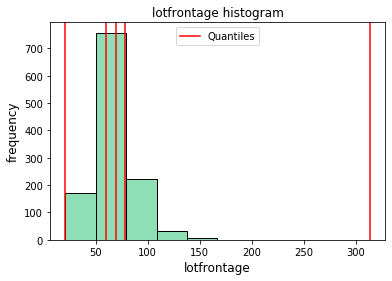

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for lotarea 
 [1300, 1477, 1491, 1526, 1533, 1596, 17400, 17500, 17542, 17600, 17671, 17755, 17871, 18000, 18030, 18386, 18800, 18890, 19138, 19296, 19900, 20544, 20781, 21286, 21384, 21453, 21535, 21695, 21750, 21780, 21872, 21930, 22420, 22950, 23595, 24090, 24682, 25000, 25286, 25339, 26142, 26178, 27650, 29959, 31770, 32463, 34650, 35133, 35760, 36500, 39104, 45600, 46589, 50271, 53107, 53227, 53504, 57200, 70761, 115149, 159000, 164660, 215245]


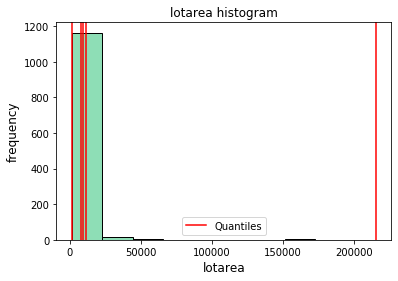

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for masvnrarea 
 [376.0, 378.0, 387.0, 388.0, 391.0, 396.0, 399.0, 408.0, 410.0, 412.0, 415.0, 420.0, 423.0, 424.0, 425.0, 438.0, 442.0, 443.0, 448.0, 451.0, 456.0, 459.0, 468.0, 472.0, 473.0, 479.0, 480.0, 491.0, 500.0, 506.0, 510.0, 513.0, 528.0, 530.0, 554.0, 562.0, 564.0, 567.0, 571.0, 573.0, 576.0, 579.0, 584.0, 594.0, 600.0, 603.0, 604.0, 616.0, 621.0, 630.0, 632.0, 640.0, 650.0, 651.0, 653.0, 660.0, 664.0, 673.0, 705.0, 731.0, 768.0, 772.0, 894.0, 921.0, 922.0, 975.0, 1047.0, 1115.0, 1129.0, 1170.0, 1378.0, 1600.0]


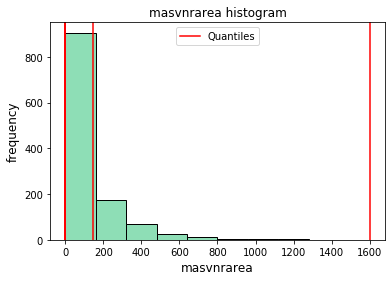

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for totalbsmtsf 
 [0, 105, 1922, 1930, 1947, 1952, 1980, 1986, 2000, 2002, 2033, 2109, 2110, 2136, 2153, 2158, 2217, 2223, 2392, 2444, 2524, 2633, 3094, 3200, 3206]


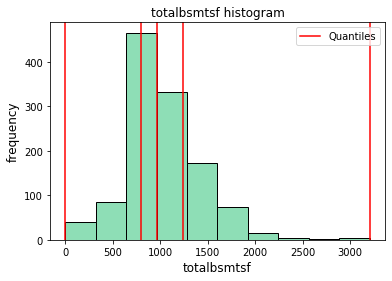

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for grlivarea 
 [2775, 2784, 2792, 2794, 2810, 2872, 2978, 3082, 3086, 3222, 3228, 3238, 3279, 3447, 3493, 3608, 3627, 4316]


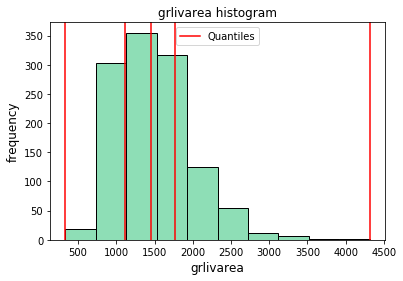

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for garagearea 
 [968, 983, 995, 1014, 1025, 1043, 1069, 1248, 1356]


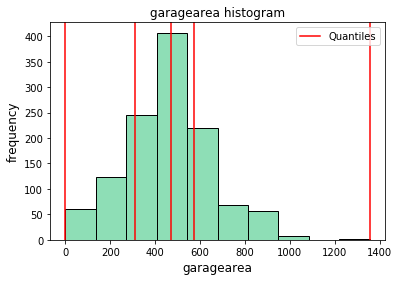

------------------------------------------------------------------------------------------------------------------------
Following are possible outliers for propertyage 
 [138, 140, 145, 148]


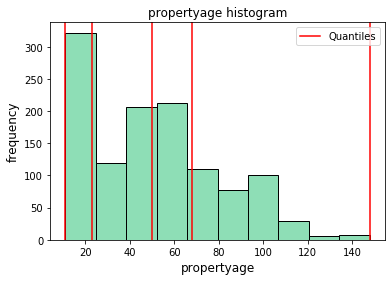

------------------------------------------------------------------------------------------------------------------------


In [117]:
#Loop to visualise and check possible outlier values for all the shortlisted variables
for i in check_list:
    check_outliers(check_df = pricing_data_df, check_variable = i)

As part of the anamoly treatment, we will **drop certain extreme datapoints** in each of the above shortlisted variables. We will also **retain** some data points treating them as **influential datapoints**.

Summary of cutoff's for each variable:
- lotfrontage	-> drop records >=313
- masvnrarea 	-> drop records >=800
- totalbsmtsf -> drop records >=2524
- grlivarea	-> drop records >=3447
- garagearea	-> drop records >=1014
- propertyage	-> drop records >=138
- lotarea		-> drop records >=115149

We will create a user defined function to treat the anamolies identified in the above variables.

In [118]:
#Create a copy of pricing_data_df as cleaned_data_df
cleaned_data_df = pricing_data_df.copy()

In [119]:
def treat_anamolies(cleaned_data_df,cutoff_limit, treatment_variable):
    
    #Check the proportion of records being dropped
    print('Proportion of records dropping due to anamoly treatment of',treatment_variable,round(len(cleaned_data_df[cleaned_data_df[treatment_variable]>=cutoff_limit])/len(cleaned_data_df) * 100,2))

    #Drop outlier records corresponding to lotfrontage
    print('Total records before dropping records', len(cleaned_data_df))
    cleaned_data_df = cleaned_data_df[pricing_data_df[treatment_variable]<cutoff_limit]
    print('Total records after dropping records', len(cleaned_data_df))
    
    return(cleaned_data_df)

Drop extreme datapoints for variable **lotfrontage**

In [120]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 313,
                                  treatment_variable = 'lotfrontage')

Proportion of records dropping due to anamoly treatment of lotfrontage 0.08
Total records before dropping records 1193
Total records after dropping records 1192


Drop extreme datapoints for variable **masvnrarea**

In [121]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 800,
                                  treatment_variable = 'masvnrarea')

Proportion of records dropping due to anamoly treatment of masvnrarea 0.84
Total records before dropping records 1192
Total records after dropping records 1182


Drop extreme datapoints for variable **totalbsmtsf**

In [122]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 2524,
                                  treatment_variable = 'totalbsmtsf')

Proportion of records dropping due to anamoly treatment of totalbsmtsf 0.42
Total records before dropping records 1182
Total records after dropping records 1177


Drop extreme datapoints for variable **grlivarea**

In [123]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 3447,
                                  treatment_variable = 'grlivarea')

Proportion of records dropping due to anamoly treatment of grlivarea 0.25
Total records before dropping records 1177
Total records after dropping records 1174


Drop extreme datapoints for variable **garagearea**

In [124]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 1014,
                                  treatment_variable = 'garagearea')

Proportion of records dropping due to anamoly treatment of garagearea 0.43
Total records before dropping records 1174
Total records after dropping records 1169


Drop extreme datapoints for variable **propertyage**

In [125]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 138,
                                  treatment_variable = 'propertyage')

Proportion of records dropping due to anamoly treatment of propertyage 0.43
Total records before dropping records 1169
Total records after dropping records 1164


Drop extreme datapoints for variable **lotarea**

In [126]:
#Set cutoff limit, variable of interest and call the function to treat anamolies
cleaned_data_df = treat_anamolies(cleaned_data_df = cleaned_data_df,
                                  cutoff_limit = 115149,
                                  treatment_variable = 'lotarea')

Proportion of records dropping due to anamoly treatment of lotarea 0.34
Total records before dropping records 1164
Total records after dropping records 1160


Thus, we are now done with analmoly detection and treatment before we proceed for exploratory data analysis.

In [127]:
print('Total records available for exploratory data analysis and modeling are',cleaned_data_df.shape[0])
print('Total variables available for exploratory data analysis and modeling are',cleaned_data_df.shape[1])

Total records available for exploratory data analysis and modeling are 1160
Total variables available for exploratory data analysis and modeling are 57


#### <font color = Blue> **Step 7: Exploratory data analysis**</font>

Analysing the quantitative variables by visualizing them.

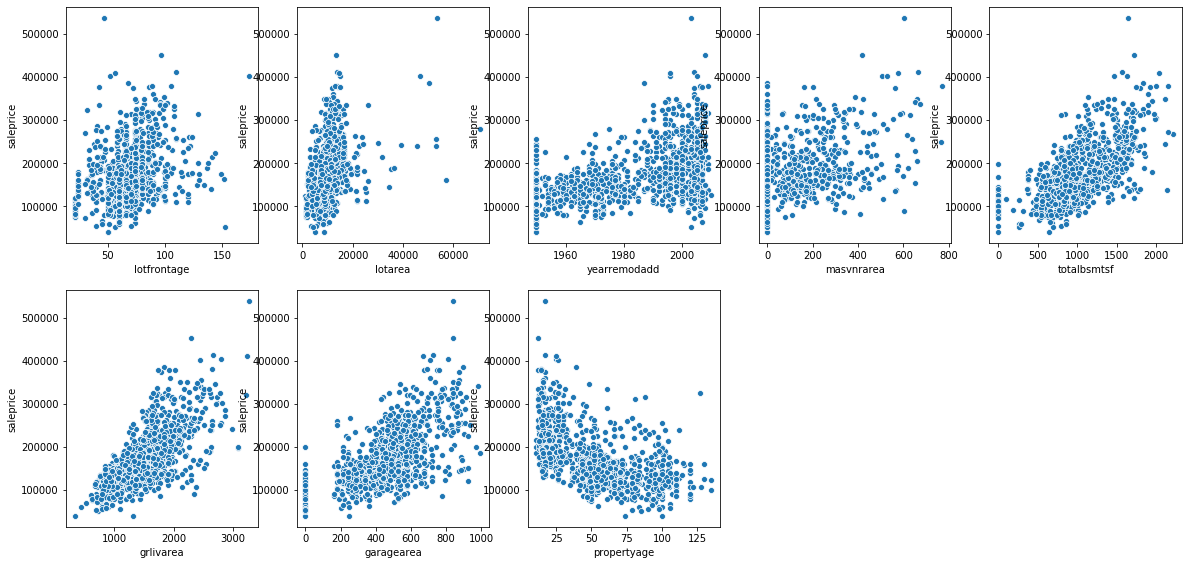

In [128]:
#Create scatter plot to view the relation between independent and dependent variable
plt.figure(figsize=(20, 20))
plt.subplot(4,5,1)
sns.scatterplot(x = 'lotfrontage', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,2)
sns.scatterplot(x = 'lotarea', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,3)
sns.scatterplot(x = 'yearremodadd', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,4)
sns.scatterplot(x = 'masvnrarea', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,5)
sns.scatterplot(x = 'totalbsmtsf', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,6)
sns.scatterplot(x = 'grlivarea', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,7)
sns.scatterplot(x = 'garagearea', y = 'saleprice', data = cleaned_data_df)
plt.subplot(4,5,8)
sns.scatterplot(x = 'propertyage', y = 'saleprice', data = cleaned_data_df)

Lets quantify the correlation using a heat map.

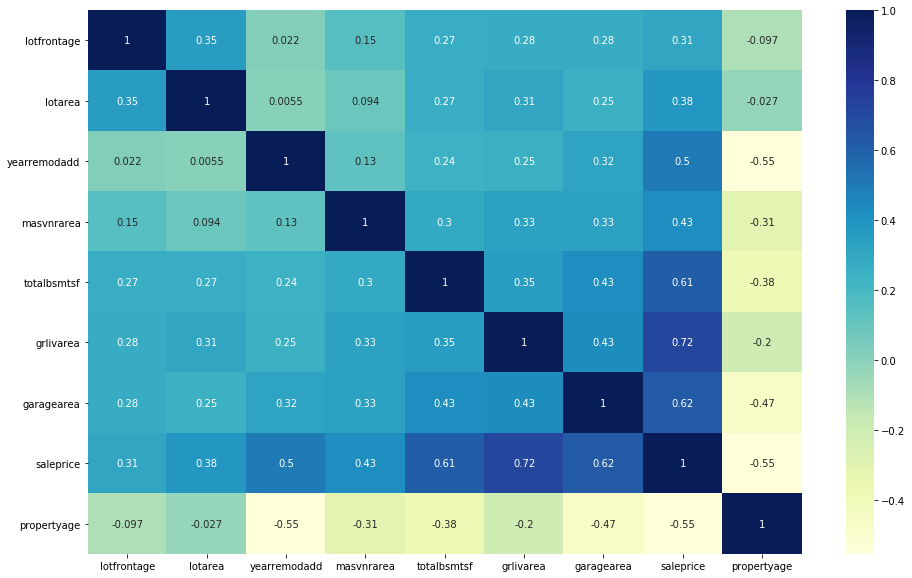

In [129]:
#Create aheatmap of quantitaative variables
plt.figure(figsize = (16, 10))
sns.heatmap(cleaned_data_df[quantitative_variables].corr(), annot = True, cmap="YlGnBu")
plt.show()

Some of the key observations from visualizing quantitative variables is as follows:

- Following variables seem to have **good positive correlation** with saleprice
    - yearremodadd
    - totalbsmtsf
    - grlivarea
    - garagearea
    
    
- The propertyage variable seem to have **negative correlation** with saleprice.


- Following variables seem to have multi-collinearity issue.
    - yearremodadd <-> propertyage

#### <font color = Blue> **Step 8: Data preparation for modeling**</font>

In [130]:
#Create modeling dataframe in which data preparation would be carried out prior to using it for modeling
modeling_df = cleaned_data_df.copy()

#Save a copy of cleaned_data_df
cleaned_data_df.to_csv('cleaned_data_df.csv')

In [131]:
#Load the data for modeling
#modeling_df = pd.read_csv('cleaned_data_df.csv',sep=",",engine='python')

#### Check if any of the qualitative variables with less cardinalities can be directly encoded into numeric form.

In [132]:
#Count the number of unique values in each variable of pricing_data_df
unique_values_df = pd.DataFrame(cleaned_data_df.nunique())

#Pull the variable names from index as a seperate column
unique_values_df.reset_index(inplace=True)

#Rename the count column and variable names columns in the unique_values_df
unique_values_df = unique_values_df.rename(columns = {0: "unique_value_count",
                                                        "index": "variable"})

#Sort the unique_values_df
unique_values_df.sort_values(["unique_value_count", "variable"], axis=0, ascending=True, inplace=True)

In [133]:
#Check the distinct levels in qualitative variables
list(unique_values_df[unique_values_df['variable'].isin(qualitative_variables)].unique_value_count.unique())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 25]

In [134]:
#View unique_values_df
unique_values_df[unique_values_df['variable'].isin(qualitative_variables)]

,variable,unique_value_count
55,haspool,2
4,alley,3
36,bsmtfullbath,3
38,halfbath,3
8,landslope,3
51,paveddrive,3
34,electrical,4
23,exterqual,4
43,fireplaces,4
37,fullbath,4


We will create dummy variables for all the qualitative variables for modeling.

#### Binning of continuous variables to categorical.

**Binning** needs to be performed for all numeric variables. We will perform **Adaptive Binning** based on available data distribution instead of **Fixed Binning** to find appropriate patterns from data.

We will use **4-Quantile** adaptive binning approach to convert numerical variable to categorical.

In [135]:
#Check the list of quantitative variables
quantitative_variables

['lotfrontage',
 'lotarea',
 'yearremodadd',
 'masvnrarea',
 'totalbsmtsf',
 'grlivarea',
 'garagearea',
 'saleprice',
 'propertyage']

In [136]:
#Set the quantiles for binning
quantile_list = [0, .25, .5, .75, 1.]
quantile_list

[0, 0.25, 0.5, 0.75, 1.0]

We will create a user defined function to identify the adaptive bin cuts for each of the quantitative variables and then do the binning.

In [137]:
def generate_bins(cleaned_data_df, quantile_list, current_variable):
    
    #Genearte the quantile values
    quantiles = cleaned_data_df[current_variable].quantile(quantile_list)

    #Plot histogram
    fig, ax = plt.subplots()
    cleaned_data_df[current_variable].hist(color='#8ec3de', edgecolor='black', grid=False)

    #Plot bin cuts over histogram
    for quantile in quantiles:
        bin_cut = plt.axvline(quantile, color='r')
    ax.legend([bin_cut], ['Quantiles'], fontsize=10)

    #Label axis
    title = current_variable + ' histogram'
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(current_variable, fontsize=12)
    ax.set_ylabel('frequency', fontsize=12)

    plt.show()

    #Check the binning values
    quantiles_df = pd.DataFrame(cleaned_data_df[current_variable].quantile(quantile_list))

    #Pull the quantiles from index as a seperate column
    quantiles_df.reset_index(inplace=True)

    #Rename the count column and variable names columns in the unique_values_df
    quantiles_df = quantiles_df.rename(columns = {'index': 'quantile'})

    print(quantiles_df)

Check the distribution and identify the bins for binning **lotfrontage** variable for modeling.

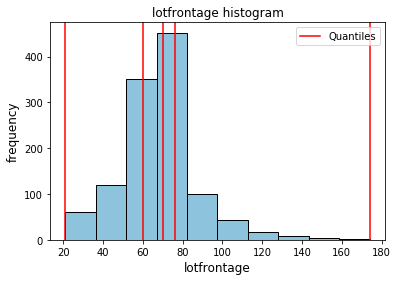

   quantile  lotfrontage
0      0.00         21.0
1      0.25         60.0
2      0.50         70.0
3      0.75         76.0
4      1.00        174.0


In [138]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'lotfrontage')
current_variable = 'lotfrontage'

Thus, our adaptive binning groups for **lotfrontage** would be:
1. 0 - 60
2. 61 - 70
3. 71 - 76
4. 77 - 174

Now lets apply these groups and update modeling dataframe.

In [139]:
#Set the adaptive binning groups
bin_labels = ['0-60', '61-70', '71-76','77-174']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,garagearea,garagequal,garagecond,paveddrive,fence,saletype,saleprice,haspool,propertyage,lotfrontage_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,548,TA,TA,Y,NoFen,WD,208500,0,17,61-70
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,460,TA,TA,Y,NoFen,WD,181500,0,44,77-174
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,608,TA,TA,Y,NoFen,WD,223500,0,19,61-70
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,836,TA,TA,Y,NoFen,WD,250000,0,20,77-174
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,480,TA,TA,Y,MnPrv,WD,143000,0,27,77-174


Binning successful for **lotfrontage**.

Check the distribution and identify the bins for binning **lotarea** variable for modeling.

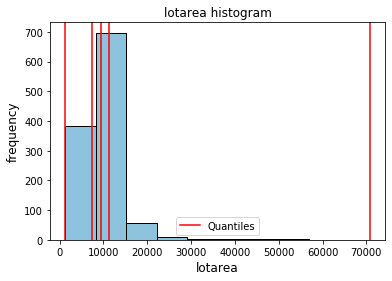

   quantile   lotarea
0      0.00   1300.00
1      0.25   7500.00
2      0.50   9375.00
3      0.75  11344.25
4      1.00  70761.00


In [140]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'lotarea')
current_variable = 'lotarea'

Thus, our adaptive binning groups for **lotarea** would be:
1. 0 - 7500
2. 7501 - 9375
3. 9376 - 11344.25
4. 11345.25 - 70761

Now lets apply these groups and update modeling dataframe.

In [141]:
#Set the adaptive binning groups
bin_labels = ['0-7500', '7501-9375', '9376-11344.25','11345.25-70761']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,garagequal,garagecond,paveddrive,fence,saletype,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,NoFen,WD,208500,0,17,61-70,7501-9375
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,TA,TA,Y,NoFen,WD,181500,0,44,77-174,9376-11344.25
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,TA,Y,NoFen,WD,223500,0,19,61-70,9376-11344.25
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,TA,Y,NoFen,WD,250000,0,20,77-174,11345.25-70761
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,TA,TA,Y,MnPrv,WD,143000,0,27,77-174,11345.25-70761


Binning successful for **lotarea**.

Check the distribution and identify the bins for binning **yearremodadd** variable for modeling.

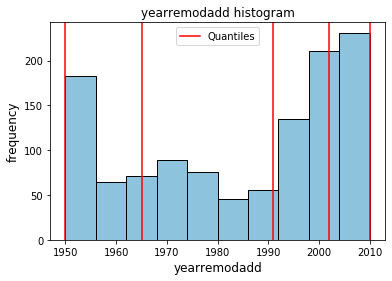

   quantile  yearremodadd
0      0.00        1950.0
1      0.25        1965.0
2      0.50        1991.0
3      0.75        2002.0
4      1.00        2010.0


In [142]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'yearremodadd')
current_variable = 'yearremodadd'

Thus, our adaptive binning groups for **yearremodadd** would be:
1. 0 - 1965
2. 1966 - 1991
3. 1992 - 2002
4. 2003 - 2010

Now lets apply these groups and update modeling dataframe.

In [143]:
#Set the adaptive binning groups
bin_labels = ['0-1965', '1966-1991', '1992-2002','2003-2010']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,garagecond,paveddrive,fence,saletype,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,TA,Y,NoFen,WD,208500,0,17,61-70,7501-9375,2003-2010
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,TA,Y,NoFen,WD,181500,0,44,77-174,9376-11344.25,1966-1991
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,TA,Y,NoFen,WD,223500,0,19,61-70,9376-11344.25,1992-2002
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,TA,Y,NoFen,WD,250000,0,20,77-174,11345.25-70761,1992-2002
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,TA,Y,MnPrv,WD,143000,0,27,77-174,11345.25-70761,1992-2002


Binning successful for **yearremodadd**.

Check the distribution and identify the bins for binning **totalbsmtsf** variable for modeling.

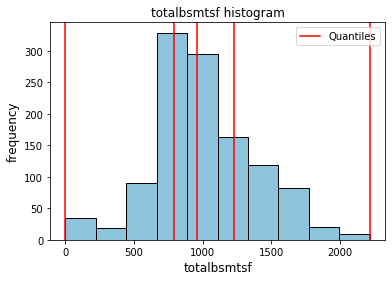

   quantile  totalbsmtsf
0      0.00         0.00
1      0.25       791.75
2      0.50       960.00
3      0.75      1229.00
4      1.00      2217.00


In [144]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'totalbsmtsf')
current_variable = 'totalbsmtsf'

Thus, our adaptive binning groups for **totalbsmtsf** would be:
1. 0 - 791.75
2. 792.75 - 960
3. 961 - 1229
4. 1230 - 2217

Now lets apply these groups and update modeling dataframe.

In [145]:
#Set the adaptive binning groups
bin_labels = ['0-791.75', '792.75-960', '961-1229','1230-2217']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,paveddrive,fence,saletype,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,Y,NoFen,WD,208500,0,17,61-70,7501-9375,2003-2010,792.75-960
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,Y,NoFen,WD,181500,0,44,77-174,9376-11344.25,1966-1991,1230-2217
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,Y,NoFen,WD,223500,0,19,61-70,9376-11344.25,1992-2002,792.75-960
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,Y,NoFen,WD,250000,0,20,77-174,11345.25-70761,1992-2002,961-1229
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,Y,MnPrv,WD,143000,0,27,77-174,11345.25-70761,1992-2002,792.75-960


Binning successful for **totalbsmtsf**.

Check the distribution and identify the bins for binning **grlivarea** variable for modeling.

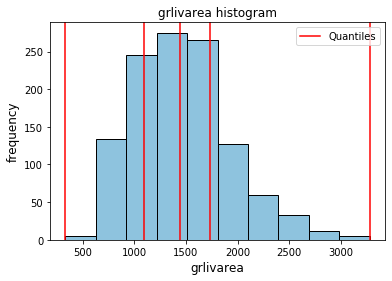

   quantile  grlivarea
0      0.00     334.00
1      0.25    1098.75
2      0.50    1440.00
3      0.75    1729.00
4      1.00    3279.00


In [146]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'grlivarea')
current_variable = 'grlivarea'

Thus, our adaptive binning groups for **grlivarea** would be:
1. 0 - 1098.75
2. 1099.75 - 1440
3. 1441 - 1729
4. 1730 - 3279

Now lets apply these groups and update modeling dataframe.

In [147]:
#Set the adaptive binning groups
bin_labels = ['0-1098.75', '1099.75-1440', '1441-1729','1730-3279']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,fence,saletype,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group,grlivarea_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,NoFen,WD,208500,0,17,61-70,7501-9375,2003-2010,792.75-960,1441-1729
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,NoFen,WD,181500,0,44,77-174,9376-11344.25,1966-1991,1230-2217,1099.75-1440
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,NoFen,WD,223500,0,19,61-70,9376-11344.25,1992-2002,792.75-960,1730-3279
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,NoFen,WD,250000,0,20,77-174,11345.25-70761,1992-2002,961-1229,1730-3279
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,MnPrv,WD,143000,0,27,77-174,11345.25-70761,1992-2002,792.75-960,1099.75-1440


Binning successful for **grlivarea**.

Check the distribution and identify the bins for binning **garagearea** variable for modeling.

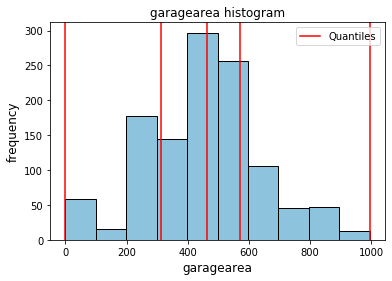

   quantile  garagearea
0      0.00         0.0
1      0.25       312.0
2      0.50       462.0
3      0.75       570.0
4      1.00       995.0


In [148]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'garagearea')
current_variable = 'garagearea'

Thus, our adaptive binning groups for **garagearea** would be:
1. 0 - 312
2. 313 - 462
3. 463 - 570
4. 571 - 995

Now lets apply these groups and update modeling dataframe.

In [149]:
#Set the adaptive binning groups
bin_labels = ['0-312', '313-462', '463-570','571-995']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,saletype,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group,grlivarea_group,garagearea_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,WD,208500,0,17,61-70,7501-9375,2003-2010,792.75-960,1441-1729,463-570
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,WD,181500,0,44,77-174,9376-11344.25,1966-1991,1230-2217,1099.75-1440,313-462
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,WD,223500,0,19,61-70,9376-11344.25,1992-2002,792.75-960,1730-3279,571-995
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,WD,250000,0,20,77-174,11345.25-70761,1992-2002,961-1229,1730-3279,571-995
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,WD,143000,0,27,77-174,11345.25-70761,1992-2002,792.75-960,1099.75-1440,463-570


Binning successful for **garagearea**.

Check the distribution and identify the bins for binning **propertyage** variable for modeling.

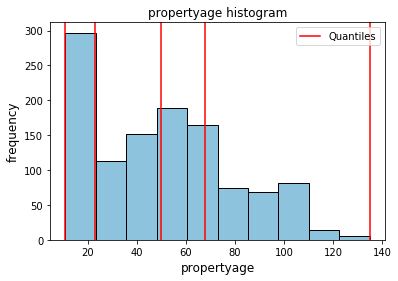

   quantile  propertyage
0      0.00         11.0
1      0.25         23.0
2      0.50         50.0
3      0.75         68.0
4      1.00        135.0


In [150]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'propertyage')
current_variable = 'propertyage'

Thus, our adaptive binning groups for **propertyage** would be:
1. 0 - 23
2. 24 - 50
3. 51 - 68
4. 69 - 135

Now lets apply these groups and update modeling dataframe.

In [151]:
#Set the adaptive binning groups
bin_labels = ['0-23', '24-50', '51-68','69-135']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,saleprice,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group,grlivarea_group,garagearea_group,propertyage_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,208500,0,17,61-70,7501-9375,2003-2010,792.75-960,1441-1729,463-570,0-23
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,181500,0,44,77-174,9376-11344.25,1966-1991,1230-2217,1099.75-1440,313-462,24-50
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,223500,0,19,61-70,9376-11344.25,1992-2002,792.75-960,1730-3279,571-995,0-23
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,250000,0,20,77-174,11345.25-70761,1992-2002,961-1229,1730-3279,571-995,0-23
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,143000,0,27,77-174,11345.25-70761,1992-2002,792.75-960,1099.75-1440,463-570,24-50


Binning successful for **propertyage**.

Check the distribution and identify the bins for binning **masvnrarea** variable for modeling. For this variable since it is hihgly skewed we will chenge the quantiles a bit for binning.

In [152]:
#Set the quantiles for binning
quantile_list = [.5, .75, 1.]
quantile_list

[0.5, 0.75, 1.0]

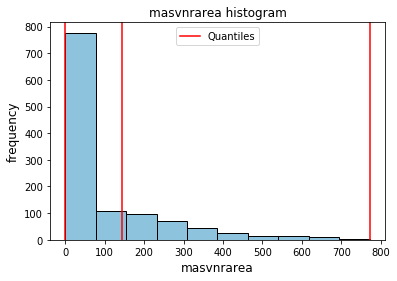

   quantile  masvnrarea
0      0.50        0.00
1      0.75      143.25
2      1.00      772.00


In [153]:
generate_bins(cleaned_data_df = cleaned_data_df, quantile_list = quantile_list, current_variable = 'masvnrarea')
current_variable = 'masvnrarea'

Thus, our adaptive binning groups for **masvnrarea** would be:
1. 0 - 143.25
2. 144.25 - 772

Now lets apply these groups and update modeling dataframe.

In [154]:
#Set the adaptive binning groups
bin_labels = ['0-143.25', '144.25-772']

#Create new categorical variable
current_variable_group = current_variable + '_group'
modeling_df[current_variable_group] = pd.qcut(modeling_df[current_variable], q = quantile_list,labels = bin_labels)

modeling_df.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,...,haspool,propertyage,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group,grlivarea_group,garagearea_group,propertyage_group,masvnrarea_group
0,60,RL,65.0,8450,Noally,Reg,Lvl,Inside,Gtl,CollgCr,...,0,17,61-70,7501-9375,2003-2010,792.75-960,1441-1729,463-570,0-23,144.25-772
1,20,RL,80.0,9600,Noally,Reg,Lvl,FR2,Gtl,Veenker,...,0,44,77-174,9376-11344.25,1966-1991,1230-2217,1099.75-1440,313-462,24-50,0-143.25
2,60,RL,68.0,11250,Noally,IR1,Lvl,Inside,Gtl,CollgCr,...,0,19,61-70,9376-11344.25,1992-2002,792.75-960,1730-3279,571-995,0-23,144.25-772
4,60,RL,84.0,14260,Noally,IR1,Lvl,FR2,Gtl,NoRidge,...,0,20,77-174,11345.25-70761,1992-2002,961-1229,1730-3279,571-995,0-23,144.25-772
5,50,RL,85.0,14115,Noally,IR1,Lvl,Inside,Gtl,Mitchel,...,0,27,77-174,11345.25-70761,1992-2002,792.75-960,1099.75-1440,463-570,24-50,0-143.25


Binning successful for **masvnrarea**.

#### Re-check the quantitative and qualitative variables

Drop the original independent quantitative variables as we have already derived qualitative version of them post binning. 

In [155]:
#Drop the original quantitative independnet variable
modeling_df.drop(['lotfrontage',
                  'lotarea',
                  'yearremodadd',
                  'masvnrarea',
                  'totalbsmtsf',
                  'grlivarea',
                  'garagearea',
                  'propertyage'],
                   axis = 1,
                   inplace = True)

In [156]:
#Check which columns are quantitative and which columns are qualitative
all_variables = modeling_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(modeling_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in pricing_data_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

print('\nFollowing are the quantitative variables for modeling: ', quantitative_variables)

Total variables available in pricing_data_df are:  57
Total quantitative variables are:  1
Total qualitative variables are:  56

Following are the quantitative variables for modeling:  ['saleprice']


Thus we have all categorical variables left apart from the dependnet variable. We will now create dummy variables for modeling.

In [157]:
#Take a back up of modeling dataframe
modeling_df.to_csv('modeling_df.csv')

#### Create dummy variables

In [158]:
#Load the data for modeling
#modeling_df = pd.read_csv('modeling_df.csv',sep=",",engine='python')

Before we create dummy variables, we need to updated the values in each column to create some descripency between same values corresponding to different columns.


We will respective prefix the column name to each value in the modeling_df dataframe and then create dummy variables for modelig.

In [159]:
#Check the data before update
modeling_df.head()

,mssubclass,mszoning,alley,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,condition2,...,saleprice,haspool,lotfrontage_group,lotarea_group,yearremodadd_group,totalbsmtsf_group,grlivarea_group,garagearea_group,propertyage_group,masvnrarea_group
0,60,RL,Noally,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,208500,0,61-70,7501-9375,2003-2010,792.75-960,1441-1729,463-570,0-23,144.25-772
1,20,RL,Noally,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,181500,0,77-174,9376-11344.25,1966-1991,1230-2217,1099.75-1440,313-462,24-50,0-143.25
2,60,RL,Noally,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,223500,0,61-70,9376-11344.25,1992-2002,792.75-960,1730-3279,571-995,0-23,144.25-772
4,60,RL,Noally,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,250000,0,77-174,11345.25-70761,1992-2002,961-1229,1730-3279,571-995,0-23,144.25-772
5,50,RL,Noally,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,143000,0,77-174,11345.25-70761,1992-2002,792.75-960,1099.75-1440,463-570,24-50,0-143.25


In [160]:
#Create a loop to update all values by prefix its column name except the dependent variable
for i in modeling_df.columns:
    if i == 'saleprice':
        i=i
    else:
        modeling_df[i] = i + '_' + modeling_df[i].astype(str)

In [161]:
#Check the data after update
modeling_df[['condition1','condition2']].head()

,condition1,condition2
0,condition1_Norm,condition2_Norm
1,condition1_Feedr,condition2_Norm
2,condition1_Norm,condition2_Norm
4,condition1_Norm,condition2_Norm
5,condition1_Norm,condition2_Norm


The discrepancy is created as expected. Thus, post modeling we will be able to identify the right set of significant variables now.

In [162]:
#User defined function to create dummy variavles for a given independent variable
def create_dummy_variables(modeling_df, predictor_variable):
    
    #Create dummy variable
    current_dummies = pd.get_dummies(modeling_df[predictor_variable], drop_first = True)
    
    #Concate the newly created dummy variables with modeling_df
    modeling_df = pd.concat([modeling_df, current_dummies], axis = 1)
        
    return(modeling_df)

In [163]:
#Create a loop to derive dummies for each of the independent variables
for i in qualitative_variables:
    
    #set current predictor variable
    predictor_variable = i
    
    #Print the addtion made by each predictor variable
    print('Total independnet variables before create dummies for',predictor_variable,'are',modeling_df.shape[1]-1)
    modeling_df = create_dummy_variables(modeling_df = modeling_df, predictor_variable = i)
    print('Total independnet variables after create dummies for',predictor_variable,'are',modeling_df.shape[1]-1)

Total independnet variables before create dummies for lotshape are 56
Total independnet variables after create dummies for lotshape are 59
Total independnet variables before create dummies for bsmtfullbath are 59
Total independnet variables after create dummies for bsmtfullbath are 61
Total independnet variables before create dummies for landslope are 61
Total independnet variables after create dummies for landslope are 63
Total independnet variables before create dummies for garagequal are 63
Total independnet variables after create dummies for garagequal are 68
Total independnet variables before create dummies for overallqual are 68
Total independnet variables after create dummies for overallqual are 77
Total independnet variables before create dummies for mssubclass are 77
Total independnet variables after create dummies for mssubclass are 91
Total independnet variables before create dummies for foundation are 91
Total independnet variables after create dummies for foundation are 96

In [164]:
#Check number of rows and columns in the modeling_df
print('There are',modeling_df.shape[0],'records and',modeling_df.shape[1],'variables in the data available for modeling.')

There are 1160 records and 341 variables in the data available for modeling.


Drop the original qualitative variables since we have dummies created for them.

In [165]:
#Drop the original qualitative independnet variable for whom we have dummies now
modeling_df.drop(qualitative_variables, axis = 1, inplace = True)

In [166]:
#Check number of rows and columns in the modeling_df
print('There are',modeling_df.shape[0],'records and',modeling_df.shape[1],'variables in the data available for modeling.')

There are 1160 records and 285 variables in the data available for modeling.


In [167]:
#Save results for back up
modeling_df.to_csv('modeling_df_dummies.csv')

#### Anamoly detection - dependent variable

Check for possible outliers in dependnet variable.

Following are possible outliers for saleprice 
 [309000, 310000, 311500, 312500, 313000, 315000, 315500, 315750, 316600, 317000, 319900, 320000, 324000, 325000, 326000, 328000, 333168, 335000, 336000, 337000, 337500, 340000, 341000, 345000, 348000, 350000, 354000, 360000, 374000, 375000, 377426, 377500, 378500, 380000, 381000, 385000, 386250, 402000, 403000, 410000, 412500, 430000, 451950, 466500, 475000, 538000, 555000, 625000, 755000]


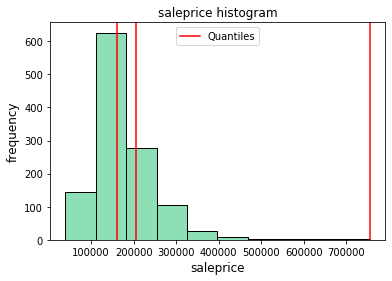

------------------------------------------------------------------------------------------------------------------------


In [168]:
#Check the outliers in dependent variable
check_outliers(check_df = modeling_df, check_variable = 'saleprice')

In [169]:
#Check the skewness of the dependent variable
modeling_df.saleprice.skew(axis = 0, skipna = True)

1.1670189439781251

The extreme data points in **saleprice** correspond to **properties with high value** and **should not be dropped**. Thus, we will treat these datapoints as **influential datapoints** instead of outliers.

We will transform the dependent variable to normalize it's distribution.

In [170]:
#Use log transformation to normalize the distribution of dependent variable
modeling_df['saleprice_transformed'] = np.log1p(modeling_df['saleprice'])

In [171]:
#Check the skewness of the dependent variable post transformation
modeling_df.saleprice_transformed.skew(axis = 0, skipna = True)

-0.03844667102389284

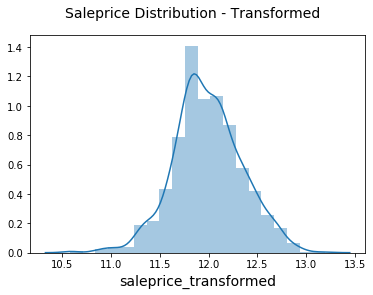

In [172]:
#View the normalized distribution for dependent variables
fig = plt.figure()
sns.distplot((modeling_df['saleprice_transformed']), bins = 20)
fig.suptitle('Saleprice Distribution - Transformed', fontsize = 14)        # Plot heading 
plt.xlabel('saleprice_transformed', fontsize = 14)                         # X-label
plt.show()

In [173]:
#Drop the original dependnet variable
modeling_df.drop('saleprice', axis = 1, inplace = True)

#### <font color = Blue> **Step 9: Create train and test datastes for modeling**</font>

#### Create train & test split

As the first basic step for regression we will perform a **train-test split** of the available data. **80%** of the data would be utilised for training and **20%** would be reserved for testing the model accuracy.

In [174]:
#We specify a seed state to regenerate same set of train and test records for every iteration
train_df, test_df = train_test_split(modeling_df, train_size = 0.8, test_size = 0.2, random_state = 123)

In [175]:
#Check the train set
train_df.shape

(928, 285)

In [176]:
#Check the test set
test_df.shape

(232, 285)

#### Check the quantitative variables to be scaled before feeding them to model.

In [177]:
#Check which columns are quantitative and which columns are qualitative
all_variables = modeling_df.columns

#Identify columns loaded as quantitative
quantitative_variables = list(modeling_df.select_dtypes(include=[np.number]).columns.values)

#Identify columns loaded as qualitative
qualitative_variables = list(set(all_variables) - set(quantitative_variables))

print('Total variables available in modeling_df are: ', len(all_variables))
print('Total quantitative variables are: ', len(quantitative_variables))
print('Total qualitative variables are: ', len(qualitative_variables))

Total variables available in modeling_df are:  285
Total quantitative variables are:  285
Total qualitative variables are:  0


#### Rescale the variables to have comparable scale

Sine we have already convert all quantitative variable to qualitative via binning prior to dummy variable creation. We will not need any Standardisation or Min-Max scaling to normalise the any variables.

In [178]:
#Create a list of all independent variables
variable_list = modeling_df.columns[~modeling_df.columns.isin(['saleprice_transformed'])]

In [179]:
#Check the max and min value across all independnet variables
max_value = pd.DataFrame((modeling_df[variable_list].max()))
min_value = pd.DataFrame((modeling_df[variable_list].min()))

#Check the unique max value across all independent variables
print('The max value across all columns is',max_value[0].unique()[0])
print('The min value across all columns is',min_value[0].unique()[0])

The max value across all columns is 1
The min value across all columns is 0


Thus, there no need for any scaling for modeling.

#### <font color = Blue> **Step 10: Modeling & Evaluation**</font>

#### Divide the train data into X and y sets for the model building

In [180]:
#Create the X & y set for train data
y_train = train_df.pop('saleprice_transformed')
X_train = train_df

In [181]:
#Check the y_train
y_train.shape

(928,)

In [182]:
#Check X_train
X_train.shape

(928, 284)

#### Feature reduction using RFE

Now, since we have too many independent variables to consider and find the most significant ones for modelling. We will implement RFE - **Recursive Feature Elimination** first to get the subset of prominent predictors.

In [183]:
#Setup lineargression for RFE with the desired number of features to be selected
number_of_features = 100
lm = LinearRegression()
lm.fit(X_train, y_train)

#Running RFE
rfe = RFE(lm, number_of_features)       
rfe = rfe.fit(X_train, y_train)

In [184]:
#Check the prominent fetures identified
prominent_features = X_train.columns[rfe.support_]
prominent_features

Index(['bsmtfullbath_1', 'bsmtfullbath_2', 'landslope_Sev', 'garagequal_Fa',
       'garagequal_Gd', 'garagequal_NG', 'garagequal_Po', 'garagequal_TA',
       'overallqual_10', 'overallqual_2', 'overallqual_3', 'overallqual_4',
       'overallqual_5', 'overallqual_6', 'overallqual_7', 'overallqual_8',
       'overallqual_9', 'mssubclass_160', 'mssubclass_180', 'mssubclass_190',
       'mssubclass_30', 'mssubclass_45', 'mssubclass_80', 'mssubclass_90',
       'bsmtfintype2_BLQ', 'bsmtfintype2_NBA', 'functional_Maj2',
       'totalbsmtsf_group_1230-2217', 'garagecond_Fa', 'garagecond_Gd',
       'garagecond_NG', 'garagecond_Po', 'garagecond_TA', 'bsmtfintype1_NBA',
       'roofstyle_Shed', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bsmtcond_NB',
       'bsmtcond_Po', 'totrmsabvgrd_12', 'totrmsabvgrd_2', 'overallcond_2',
       'overallcond_3', 'overallcond_4', 'overallcond_5', 'overallcond_6',
       'overallcond_7', 'overallcond_8', 'overallcond_9', 'condition2_Feedr',
       'condition2_Nor

The set of 100 prominent features has some of the important actionable variables from domain perspective. So we will proceed with these to build our advance regression models for prediction.

In [185]:
#Create a list of prominent features
prominent_features = prominent_features.to_list()

In [186]:
#Update the train data with only prominent_features
X_train = X_train[prominent_features]

#Check the structure of updated training data
X_train.shape

(928, 100)

In [187]:
#Update the test data with only prominent_features
prominent_features.append('saleprice_transformed')

#Subset test data
test_df = test_df[prominent_features]

#Check the structure of updated test data
test_df.shape

(232, 101)

In [188]:
#Create a list of alphas to tune during advance regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#### Ridge Regression

#### Fit Ridge regression model using k-fold cross validation

In [189]:
#Set the estimator
ridge = Ridge()

#Set the folds
folds = 5

#Set the cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#Run the cross validation
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Identify best alpha

In [190]:
#View the cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=40]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008934,0.008299,0.002607,0.003265,0.0001,{'alpha': 0.0001},-0.089132,-0.089055,-0.089100,-0.081523,...,-0.086428,0.003316,15,-0.075438,-0.075102,-0.073026,-0.075890,-0.076170,-0.075125,0.001112
1,0.003033,0.004108,0.003978,0.003412,0.001,{'alpha': 0.001},-0.089134,-0.089040,-0.089097,-0.081517,...,-0.086423,0.003317,14,-0.075439,-0.075104,-0.073029,-0.075893,-0.076173,-0.075127,0.001112
2,0.003860,0.003365,0.004941,0.003090,0.01,{'alpha': 0.01},-0.089152,-0.088893,-0.089074,-0.081456,...,-0.086368,0.003324,13,-0.075442,-0.075130,-0.073057,-0.075924,-0.076200,-0.075151,0.001111
3,0.002831,0.003756,0.001605,0.002738,0.05,{'alpha': 0.05},-0.089233,-0.088311,-0.088997,-0.081205,...,-0.086151,0.003365,12,-0.075460,-0.075258,-0.073201,-0.076052,-0.076322,-0.075258,0.001099
4,0.003707,0.003096,0.004874,0.003564,0.1,{'alpha': 0.1},-0.089317,-0.087714,-0.088930,-0.080934,...,-0.085926,0.003430,11,-0.075483,-0.075470,-0.073427,-0.076199,-0.076497,-0.075415,0.001072


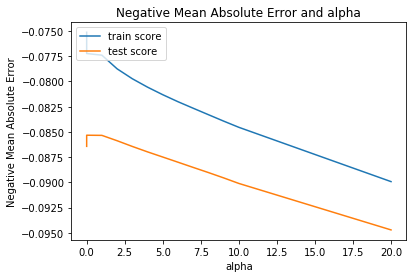

In [191]:
#Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [192]:
#Check the best fit alpha value
cv_results['param_alpha'].to_list()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

#### Build final model using best alpha

In [194]:
#Re-run the model with best alpha
alpha = 1
ridge = Ridge(alpha=alpha)        
ridge.fit(X_train, y_train) 

Ridge(alpha=1)

In [195]:
#View the feature selection performed by Ridge by making certain coefficients zero
ridge.coef_

array([ 5.83973771e-02,  1.43386329e-01, -7.70377706e-02, -9.87865922e-02,
       -5.32533423e-04, -5.02957449e-02,  1.93823622e-02, -5.82693066e-02,
        1.67204036e-01, -1.89461203e-01, -2.13248664e-02, -6.85397126e-02,
        4.99330433e-03,  4.11129783e-02,  1.06658578e-01,  1.87637787e-01,
        2.38972593e-01, -1.22459904e-01, -1.55214861e-01, -7.01066526e-02,
       -8.91910697e-02, -3.96275174e-02, -5.78353050e-02, -5.81531127e-02,
       -6.39954295e-02, -2.32357161e-02, -1.00391928e-01,  6.36039617e-02,
       -5.72358197e-02, -1.93116641e-02, -5.02957449e-02, -1.00261342e-01,
        3.86027561e-02, -2.32357161e-02,  6.22560444e-03, -5.81531127e-02,
       -5.70105626e-02, -2.32357161e-02, -1.89026227e-01,  9.16433146e-02,
       -2.78227267e-01, -2.15706354e-01, -1.45285544e-01, -3.98679766e-02,
        5.93348048e-02,  8.44332609e-02,  1.34433870e-01,  1.38699219e-01,
        1.72984947e-01, -6.33801029e-02,  5.21317507e-02,  1.05283135e-01,
        0.00000000e+00, -

As expected **none of the coefficient values is zero** for **ridge regression**.

#### Identify top 10 predictors - positive and negative impacting

In [196]:
#Create a list of model parameters
model_parameters = ridge.coef_
model_parameters = model_parameters.tolist()
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

#Create a dataframe of model parameters
model_parameters_df = pd.DataFrame(model_parameters)

#Rename the coeffiecient column and index column in model_parameters_df
model_parameters_df = model_parameters_df.rename(columns = {0: "coefficient",})

In [197]:
#Create a list of model variables
cols = X_train.columns
cols = cols.insert(0, "constant")            #insert a constant variable for intercept
cols_df = pd.DataFrame(cols)

#Rename the coeffiecient column and index column in cols_df
cols_df = cols_df.rename(columns = {0: "variable"})

In [198]:
#Combine model predictors and there coefficient values in a dataframe
model_coefficients_df = pd.concat([cols_df,model_parameters_df], axis=1)

#Remove the insignificant predictors
model_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']!=0]

#Create datframes for positive and negative coefficient predictors
positive_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']>0]
negative_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']<0]

#Sort to find top 10 impactful predictors
positive_coefficients_df.sort_values(['coefficient'], axis=0, ascending=False, inplace=True)
negative_coefficients_df.sort_values(['coefficient'], axis=0, ascending=False, inplace=True)

In [199]:
#Check top 10 positive impact predictors
positive_coefficients_df.head(10)

,variable,coefficient
88,grlivarea_group_1730-3279,0.248
17,overallqual_9,0.239
59,mszoning_FV,0.236
16,overallqual_8,0.188
49,overallcond_9,0.173
9,overallqual_10,0.167
73,neighborhood_Crawfor,0.166
97,fullbath_3,0.161
61,mszoning_RL,0.151
87,grlivarea_group_1441-1729,0.147


In [200]:
#Check top 10 negative impact predictors
negative_coefficients_df.head(10)

,variable,coefficient
5,garagequal_Gd,-0.001
77,fireplaces_1,-0.007
66,exterior1st_CBlock,-0.012
81,exterior2nd_CBlock,-0.012
30,garagecond_Gd,-0.019
11,overallqual_3,-0.021
91,bsmtqual_NB,-0.023
34,bsmtfintype1_NBA,-0.023
26,bsmtfintype2_NBA,-0.023
38,bsmtcond_NB,-0.023


#### Understand goodness of fit of the final model

In [201]:
#Make predictions on test data
y_train_pred = ridge.predict(X_train)

#Compute the residuals
residuals = y_train - y_train_pred

In [202]:
#Import the r2_score function from metrics module of sklearn package
from sklearn.metrics import r2_score

#Check the r2_score on train data
r2_score(y_train, y_train_pred)

0.9122327606442896

We are able to **explain about 91% of variation in the dependent variable** using the independent variables we shortlisted in our model and make good predictions. 

#### Validating regression assumptions for final model

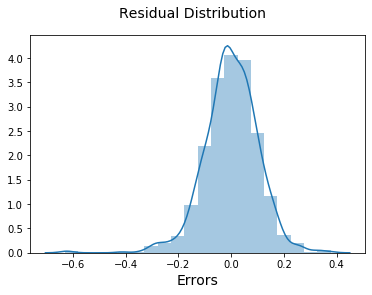

In [203]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Residual Distribution', fontsize = 14)        # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

In [204]:
#Check if mean of residuals is close to zero
np.mean(residuals)

1.4643458859280082e-15

The distribution of residuals does look similiar to a **normal distribution with mean close to zero**.

#### Check if residuals have constant variance - Homoscedastic

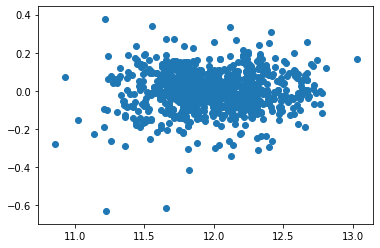

In [205]:
#Plot a scatter plot to check for constant variance
plt.scatter(y_train_pred,residuals)
plt.show()

The variance appears to be fairly constant **without any obvious pattern** in it.

#### Check if residuals are independent - No Autocorrelation

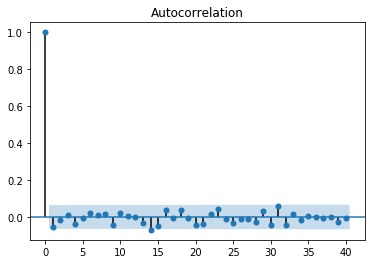

In [206]:
acf = smt.graphics.plot_acf(residuals, lags= 40, alpha = 0.05)
acf.show()

None of the lags cross the significance threshold. Thus, the residuals appear to be **independent**.

Since none of the assumptions of linear regression is violated, we are now confident that the **model fit isn't by chance** and has **decent predictive power**. The normality of residual terms allows us to draw some inference on the coefficients.

#### Making Predictions on test data

#### Dividing into X_test and y_test

In [207]:
#Create y_test and X_test
y_test = test_df.pop('saleprice_transformed')
X_test = test_df

In [208]:
#Retain only relevant variables in test set as per final model
X_test = X_test[(X_train.columns.tolist())]

In [209]:
#Check the variables retained in test data
X_test.columns

Index(['bsmtfullbath_1', 'bsmtfullbath_2', 'landslope_Sev', 'garagequal_Fa',
       'garagequal_Gd', 'garagequal_NG', 'garagequal_Po', 'garagequal_TA',
       'overallqual_10', 'overallqual_2', 'overallqual_3', 'overallqual_4',
       'overallqual_5', 'overallqual_6', 'overallqual_7', 'overallqual_8',
       'overallqual_9', 'mssubclass_160', 'mssubclass_180', 'mssubclass_190',
       'mssubclass_30', 'mssubclass_45', 'mssubclass_80', 'mssubclass_90',
       'bsmtfintype2_BLQ', 'bsmtfintype2_NBA', 'functional_Maj2',
       'totalbsmtsf_group_1230-2217', 'garagecond_Fa', 'garagecond_Gd',
       'garagecond_NG', 'garagecond_Po', 'garagecond_TA', 'bsmtfintype1_NBA',
       'roofstyle_Shed', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bsmtcond_NB',
       'bsmtcond_Po', 'totrmsabvgrd_12', 'totrmsabvgrd_2', 'overallcond_2',
       'overallcond_3', 'overallcond_4', 'overallcond_5', 'overallcond_6',
       'overallcond_7', 'overallcond_8', 'overallcond_9', 'condition2_Feedr',
       'condition2_Nor

In [210]:
#Make predictions
y_test_pred = ridge.predict(X_test)

Now that we have completed the predictions on test data, we can proceed to evaluate the model.

#### Model Evaluation

#### Visualise actual vs predicted values in test data

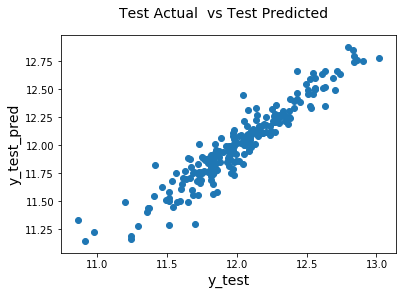

In [211]:
#Plot y_test and y_predicted
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test Actual  vs Test Predicted', fontsize = 14)              # Plot heading 
plt.xlabel('y_test', fontsize = 14)                                        # X-label
plt.ylabel('y_test_pred', fontsize = 14)
plt.show()

From the above plot it is evident that our data scattered symmetrically about a 45 degree diagonal. This is an indication that out model is able to make good predictions on unseen test data as well. 

In [212]:
#Create dataframe from actual Vs predicted values to compare
result = {'test_actual':y_test,'test_predicted': y_test_pred}
result_df = pd.DataFrame(result)

#Sort the data frame
result_df.sort_values(['test_actual'], axis=0, ascending=True, inplace=True)

#Derive error column
result_df['error'] = result_df['test_actual'] - result_df['test_predicted']

#View prediction dataframe
result_df.head(10)

,test_actual,test_predicted,error
710,10.859018,11.330736,-0.471718
705,10.915107,11.141452,-0.226345
1380,10.976799,11.221563,-0.244764
264,11.198228,11.495308,-0.297079
383,11.238502,11.192887,0.045614
250,11.245059,11.166890,0.078169
1144,11.289794,11.275644,0.014150
976,11.356283,11.401641,-0.045357
528,11.362114,11.441614,-0.079500
1022,11.373675,11.443049,-0.069374


#### Check R squared on test data

Any prediction model needs to be generalised enough to make good predictions on unseen data as well. Lets llok into the Rsquared for the predictions made on the test data  for our final model.

In [213]:
#Import the r2_score function from metrics module of sklearn package
from sklearn.metrics import r2_score

#Check the r2_score on test data
r2_score(y_test, y_test_pred)

0.8968900970777904

We are **able to explain about 89.93% of variation in the test data** using the independent variables we shortlisted in our model and make good predictions. Thus our **ridge regression model is generalised** one.

#### Lasso Regression

#### Fit Lasso regression model using k-fold cross validation

In [311]:
#Set the estimator
lasso = Lasso()

#Set the folds
folds = 5

#Set the cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

#Run the cross validation
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### Identify best alpha

In [312]:
#View the cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=70]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019049,0.005969,0.000305,0.000611,0.0001,{'alpha': 0.0001},-0.088573,-0.082789,-0.087164,-0.076831,...,-0.083569,0.004127,1,-0.073163,-0.074193,-0.073356,-0.075156,-0.074891,-0.074152,0.000796
1,0.008308,0.002056,0.001173,0.000723,0.001,{'alpha': 0.001},-0.097853,-0.089644,-0.097470,-0.082570,...,-0.090935,0.005944,2,-0.083872,-0.084914,-0.083578,-0.085028,-0.084145,-0.084307,0.000572
2,0.005153,0.002679,0.000308,0.000616,0.01,{'alpha': 0.01},-0.141599,-0.129735,-0.142389,-0.111109,...,-0.129981,0.011569,3,-0.123113,-0.125171,-0.126458,-0.130337,-0.128193,-0.126655,0.002478
3,0.002532,0.002315,0.003415,0.003026,0.05,{'alpha': 0.05},-0.214828,-0.204599,-0.222258,-0.169978,...,-0.201875,0.018030,4,-0.198274,-0.198407,-0.200386,-0.204622,-0.200426,-0.200423,0.002294
4,0.003646,0.004180,0.000399,0.000488,0.1,{'alpha': 0.1},-0.283444,-0.271407,-0.297095,-0.250647,...,-0.274300,0.015493,5,-0.273145,-0.276241,-0.269773,-0.278902,-0.273578,-0.274328,0.003075


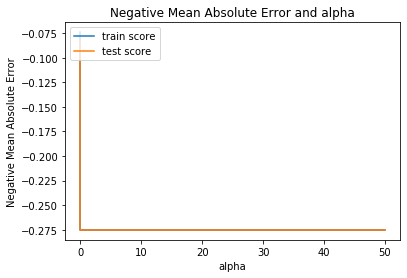

In [313]:
#Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [314]:
#Check the best fit alpha value
cv_results['param_alpha'].to_list()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50]

#### Build final model using best alpha

In [344]:
#Re-run the model with best alpha
alpha =0.001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [345]:
#View the feature selection performed by lasso by making certain coefficients zero
lasso.coef_

array([ 0.        , -0.        ,  0.01638515,  0.05431403,  0.1175594 ,
        0.20270643,  0.26756978, -0.        ,  0.        , -0.        ,
        0.        , -0.07929816, -0.        ,  0.10071326, -0.        ,
        0.        ,  0.06142125,  0.        , -0.07570444, -0.        ,
       -0.00668281, -0.08533679, -0.        ,  0.        , -0.04589953,
       -0.        ,  0.03391591,  0.11830397,  0.20735587, -0.        ,
       -0.12477696,  0.05069886,  0.06972673,  0.13662643,  0.12902944,
        0.14864631, -0.05647553,  0.0067396 ,  0.13253416, -0.09501008,
        0.0277134 ,  0.0570188 ,  0.02779477,  0.        ,  0.0167012 ,
        0.        ,  0.02197969, -0.        , -0.        , -0.        ,
       -0.06289948,  0.15709418,  0.12684326,  0.05624522, -0.0024797 ,
       -0.05005611, -0.0138322 ,  0.        , -0.        , -0.        ,
        0.        ,  0.05981108, -0.        ,  0.01369739,  0.        ,
       -0.06554886,  0.        ,  0.09444323,  0.        ,  0.07

As expected **most of the coefficient values are zero** for **lasso regression** due to it's feature selection ability.

#### Identify top 10 predictors - positive and negative impacting

In [346]:
#Create a list of model parameters
model_parameters = lasso.coef_
model_parameters = model_parameters.tolist()
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

#Create a dataframe of model parameters
model_parameters_df = pd.DataFrame(model_parameters)

#Rename the coeffiecient column and index column in model_parameters_df
model_parameters_df = model_parameters_df.rename(columns = {0: "coefficient",})

In [347]:
#Create a list of model variables
cols = X_train.columns
cols = cols.insert(0, "constant")            #insert a constant variable for intercept
cols_df = pd.DataFrame(cols)

#Rename the coeffiecient column and index column in cols_df
cols_df = cols_df.rename(columns = {0: "variable"})

In [348]:
#Combine model predictors and there coefficient values in a dataframe
model_coefficients_df = pd.concat([cols_df,model_parameters_df], axis=1)

#Remove the insignificant predictors
model_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']!=0]

#Create datframes for positive and negative coefficient predictors
positive_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']>0]
negative_coefficients_df = model_coefficients_df[model_coefficients_df['coefficient']<0]

#Sort to find top 10 impactful predictors
positive_coefficients_df.sort_values(['coefficient'], axis=0, ascending=False, inplace=True)
negative_coefficients_df.sort_values(['coefficient'], axis=0, ascending=False, inplace=True)

In [349]:
#Check top 10 positive impact predictors
positive_coefficients_df.head(10)

,variable,coefficient
7,overallqual_9,0.268
29,grlivarea_group_1730-3279,0.207
6,overallqual_8,0.203
52,fullbath_3,0.157
36,overallcond_9,0.149
34,overallcond_7,0.137
39,neighborhood_Crawfor,0.133
35,overallcond_8,0.129
53,totalbsmtsf_group_1230-2217,0.127
28,grlivarea_group_1441-1729,0.118


In [350]:
#Check top 10 negative impact predictors
negative_coefficients_df.head(10)

,variable,coefficient
55,bldgtype_Duplex,-0.002
98,bsmtfintype2_BLQ,-0.003
21,mssubclass_190,-0.007
57,garagequal_Fa,-0.014
73,kitchenqual_Gd,-0.022
25,mssubclass_90,-0.046
56,bldgtype_Twnhs,-0.050
37,fireplacequ_NF,-0.056
51,fullbath_1,-0.063
66,garagecars_1,-0.066


#### Understand goodness of fit of the final model

In [351]:
#Make predictions on test data
y_train_pred = lasso.predict(X_train)

#Compute the residuals
residuals = y_train - y_train_pred

In [352]:
#Import the r2_score function from metrics module of sklearn package
from sklearn.metrics import r2_score

#Check the r2_score on train data
r2_score(y_train, y_train_pred)

0.8934443321704313

We are **able to explain about 89% of variation in the dependent variable** using the independent variables we shortlisted in our model and make good predictions. 

#### Validating regression assumptions for final model

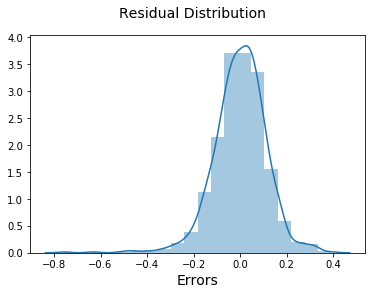

In [353]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Residual Distribution', fontsize = 14)        # Plot heading 
plt.xlabel('Errors', fontsize = 14)                         # X-label
plt.show()

In [354]:
#Check if mean of residuals is close to zero
np.mean(residuals)

1.4375473991267114e-15

The distribution of residuals does look similiar to a **normal distribution with mean close to zero**.

#### Check if residuals have constant variance - Homoscedastic

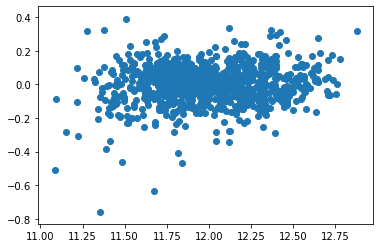

In [355]:
#Plot a scatter plot to check for constant variance
plt.scatter(y_train_pred,residuals)
plt.show()

The variance appears to be fairly constant **without any obvious pattern** in it.

#### Check if residuals are independent - No Autocorrelation

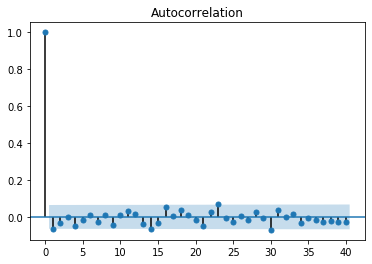

In [356]:
acf = smt.graphics.plot_acf(residuals, lags= 40, alpha = 0.05)
acf.show()

None of the lags cross the significance threshold. Thus, the residuals appear to be **independent**.

Since none of the assumptions of linear regression is violated, we are now confident that the **model fit isn't by chance** and has **decent predictive power**. The normality of residual terms allows us to draw some inference on the coefficients.

#### Making Predictions on test data

In [357]:
#Retain only relevant variables in test set as per final model
X_test = X_test[(X_train.columns.tolist())]

In [358]:
#Check the variables retained in test data
X_test.columns

Index(['overallqual_10', 'overallqual_2', 'overallqual_5', 'overallqual_6',
       'overallqual_7', 'overallqual_8', 'overallqual_9', 'housestyle_1.5Unf',
       'housestyle_SLvl', 'garagecond_Fa', 'garagecond_Gd', 'garagecond_NG',
       'garagecond_Po', 'garagecond_TA', 'bsmtcond_Po', 'roofstyle_Shed',
       'bsmtfullbath_1', 'bsmtfullbath_2', 'mssubclass_160', 'mssubclass_180',
       'mssubclass_190', 'mssubclass_30', 'mssubclass_45', 'mssubclass_80',
       'mssubclass_90', 'landslope_Sev', 'grlivarea_group_1099.75-1440',
       'grlivarea_group_1441-1729', 'grlivarea_group_1730-3279',
       'overallcond_2', 'overallcond_3', 'overallcond_5', 'overallcond_6',
       'overallcond_7', 'overallcond_8', 'overallcond_9', 'fireplacequ_NF',
       'neighborhood_BrkSide', 'neighborhood_Crawfor', 'neighborhood_MeadowV',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'garagetype_Attchd', 'garagetype_Basment',
       'garagetype

In [359]:
#Make predictions
y_test_pred = lasso.predict(X_test)

Now that we have completed the predictions on test data, we can proceed to evaluate the model.

#### Model Evaluation

#### Visualise actual vs predicted values in test data

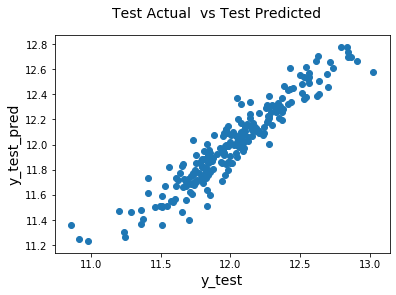

In [360]:
#Plot y_test and y_predicted
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Test Actual  vs Test Predicted', fontsize = 14)              # Plot heading 
plt.xlabel('y_test', fontsize = 14)                                        # X-label
plt.ylabel('y_test_pred', fontsize = 14)
plt.show()

From the above plot it is evident that our data scattered symmetrically about a 45 degree diagonal. This is an indication that out model is able to make good predictions on unseen test data as well. 

In [361]:
#Create dataframe from actual Vs predicted values to compare
result = {'test_actual':y_test,'test_predicted': y_test_pred}
result_df = pd.DataFrame(result)

#Sort the data frame
result_df.sort_values(['test_actual'], axis=0, ascending=True, inplace=True)

#Derive error column
result_df['error'] = result_df['test_actual'] - result_df['test_predicted']

#View prediction dataframe
result_df.head(10)

,test_actual,test_predicted,error
710,10.859018,11.357687,-0.498668
705,10.915107,11.252407,-0.337300
1380,10.976799,11.231614,-0.254815
264,11.198228,11.467988,-0.269760
383,11.238502,11.301233,-0.062731
250,11.245059,11.264949,-0.019889
1144,11.289794,11.466779,-0.176984
976,11.356283,11.367659,-0.011376
528,11.362114,11.479268,-0.117154
1022,11.373675,11.407147,-0.033472


#### Check R squared on test data

Any prediction model needs to be generalised enough to make good predictions on unseen data as well. Lets llok into the Rsquared for the predictions made on the test data  for our final model.

In [362]:
#Import the r2_score function from metrics module of sklearn package
from sklearn.metrics import r2_score

#Check the r2_score on test data
r2_score(y_test, y_test_pred)

0.8901486955184832

We are **able to explain about 89% of variation in the test data** using the independent variables we shortlisted in our model and make good predictions. 

#### <font color = Blue> **Step 11: Summarising driving factors for pricing dynamics**</font>

**Inferences from Model**:

Following are the optional lambda values for the advance regression models built:
- Ridge Regression => alpha = 1
- Lasso Regression => alpha = 0.01

<font color =blue> **Top driving factors that have positive impact on the price of the house are:**</font>

- **Overall Quality** - The overall material and finish of the house should <font color =orange>execllent</font>.
- **Overall Condition** - The overall condition of the house should be <font color =orange>execllent</font>.
- **Ground Living Area** - Above grade (ground) living area <font color =orange>greater than 1440 square feet</font>.
- **Full Bathrooms** - Theres should be <font color =orange>3 full bathrooms</font> above grade.
- **MSZoning**	- <font color =orange>Floating Village Residential</font> type of zoning is a preferred option.
- **Neighborhood**	- <font color =orange>Crawford</font> is the preferred neighborhood within Ames city limits.
- **Total Basement** - Tota basement area should be <font color =orange>greater than 1230 square feet</font>.


<font color =blue> **Top driving factors that have negative impact on the price of the house are:**</font>

- **Exterior**	- <font color =orange>Cinder Block</font> exterior is not a preferred choice.
- **Garage Capacity** - <font color =orange>No garage</font> or a garage capacity of <font color =orange>upto 2 cars only</font>.
- **Garage Quality** - <font color =orange>Fair or below</font>.
- **Fireplace** 	- Houses with <font color =orange>"No" or only "One"</font> fireplace.
- **Condition** - Adjacent to <font color =orange>North-South Railroad</font> or adjacent to <font color =orange>feeder street</font>
- **Land Slope** - <font color =orange>Severe Slope</font>
- **Dwelling Type** 
	- 1-1/2 Story - Unfinished All ages
	- Duplex - all styles and ages
	- 2 Family conversion - all styles and ages
- **Basement Finish** - <font color =orange>Below Average</font> Living Quarters
- **Full Bathroom**	- House with only <font color =orange>one full bathroom</font>


**Recommendation**:

- To venture into Australian market Surprise Housing should look into the aforementioned drivers that have positive impact on the sale price.
- Purchasing such property provides an opportunity to gain better return on investments.
- While purchasing any property, attention should also be paid to the aforementioned driver that have negative impact on the sale price and are not prefereed by customers.


